In [1]:
#import scatlasvae
import torch 
#from joblib import dump, load
import os
import random

print(torch.__version__)
print(torch.cuda.is_available())
#import scatlasvae
import scanpy as sc

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd # import pandas
import gc # import garbage collector
from typing import Literal, Union # import typing
!nvidia-smi --query-gpu=name --format=csv,noheader
#import scatlasvae
import torch 
#from joblib import dump, load
import os
import random



2.9.1+cu128
False
/bin/bash: line 1: nvidia-smi: command not found


In [2]:
adata_nogex = sc.read_h5ad('/omics/odcf/analysis/hipo/hipo_021/Rhode/um/dataset_vae/DS_files_7825/03_UM_Berlin-Cohort_AIRR.h5ad')
 

/omics/odcf/analysis/hipo/hipo_021/Rhode/environments/anndata2/lib/python3.11/site-packages/anndata/utils.py:362: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)


In [3]:
import scanpy as sc
import anndata as ad

# Dictionary mapping Dataset 1 (BD Rhapsody style) to Dataset 2 (Scirpy style)
column_map = {
    # Alpha / Gamma chain (Light/VJ)
    'TCR_Alpha_Gamma_V_gene_Dominant': 'IR_VJ_1_v_call',
    'TCR_Alpha_Gamma_J_gene_Dominant': 'IR_VJ_1_j_call',
    'TCR_Alpha_Gamma_CDR3_Translation_Dominant': 'IR_VJ_1_junction_aa',
    # 'TCR_Alpha_Gamma_C_gene_Dominant': 'IR_VJ_1_c_call', # Optional if present in target

    # Beta / Delta chain (Heavy/VDJ)
    'TCR_Beta_Delta_V_gene_Dominant': 'IR_VDJ_1_v_call',
    'TCR_Beta_Delta_J_gene_Dominant': 'IR_VDJ_1_j_call',
    'TCR_Beta_Delta_CDR3_Translation_Dominant': 'IR_VDJ_1_junction_aa',
    # 'TCR_Beta_Delta_C_gene_Dominant': 'IR_VDJ_1_c_call', # Optional
}

# Apply renaming
adata_nogex.obs.rename(columns=column_map, inplace=True)


In [4]:
adata_nogex.obs = adata_nogex.obs.drop(
    columns=[ 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'BCR_Heavy_V_gene_Dominant', 
              'BCR_Heavy_D_gene_Dominant', 'BCR_Heavy_J_gene_Dominant', 'BCR_Heavy_C_gene_Dominant', 
              'BCR_Heavy_CDR3_Nucleotide_Dominant', 'BCR_Heavy_CDR3_Translation_Dominant', 'BCR_Heavy_Read_Count', 
              'BCR_Heavy_Molecule_Count', 'BCR_Light_V_gene_Dominant', 'BCR_Light_J_gene_Dominant', 'BCR_Light_C_gene_Dominant', 
              'BCR_Light_CDR3_Nucleotide_Dominant', 'BCR_Light_CDR3_Translation_Dominant', 'BCR_Light_Read_Count', 'BCR_Light_Molecule_Count',
              'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 
              'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 
              'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'BCR_Paired_Chains', 'TCR_Paired_Chains', 'High_Quality_Cell_TCR_BCR',]
) 

In [5]:
# import re

# # Function to clean V/J gene names - removes allele suffix (*01, *02, etc.)
# def clean_gene_name(name):
#     if pd.isna(name) or name == '':
#         return name
#     # Remove allele designation (*01, *02, *03, etc.)
#     return re.sub(r'\*\d+$', '', str(name))

# # Apply to all V/J columns
# vdj_columns = ['IR_VJ_1_v_call', 'IR_VJ_1_j_call', 'IR_VDJ_1_v_call', 'IR_VDJ_1_j_call']

# for col in vdj_columns:
#     if col in adata_nogex.obs.columns:
#         adata_nogex.obs[col + '_clean'] = adata_nogex.obs[col].apply(clean_gene_name)

# # Or overwrite original columns:
# # for col in vdj_columns:
# #     if col in adata.obs.columns:
# #         adata.obs[col] = adata.obs[col].apply(clean_gene_name)

# # Verify the cleaning
# print("Before vs After:")
# for col in vdj_columns:
#     if col in adata_nogex.obs.columns:
#         print(f"\n{col}:")
#         print(adata_nogex.obs[[col, col + '_clean']].drop_duplicates().head(10))

In [ ]:
#adata_nogex.obs

In [5]:
adata_nogex2 = sc.read_h5ad('/omics/odcf/analysis/hipo/hipo_021/Rhode/um/dataset_vae/DS_files_7825/03_UM_Bigot-Karlson_AIRR.h5ad')
adata_nogex2

AnnData object with n_obs × n_vars = 12001 × 44001
    obs: 'Sample', 'Sample_Name', 'Dataset'
    var: 'n_cells', 'Bigot-et-al-2021', 'Bakhoum-et-al-2021', 'Durant-et-al-2020', 'Pandiani-et-al-2021', 'Karlsson-et-al-2024', 'Nieto-et-al-2021', 'Berlin-UM', 'Güc-et-al-2025', 'exclusive_batch_captured'
    obsm: 'airr'

In [6]:
import scirpy as ir

# Get v_call, j_call, and junction_aa for both VJ_1 and VDJ_1 chains
adata_nogex2.obs[["IR_VJ_1_v_call", "IR_VJ_1_j_call", "IR_VJ_1_junction_aa", 
                  "IR_VDJ_1_v_call", "IR_VDJ_1_j_call", "IR_VDJ_1_junction_aa"]] = ir.get.airr(
    adata_nogex2, 
    ["v_call", "j_call", "junction_aa"], 
    chain=["VJ_1", "VDJ_1"]
)


/omics/odcf/analysis/hipo/hipo_021/Rhode/environments/anndata2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
del adata_nogex.obsm["airr"]
del adata_nogex2.obsm["airr"]
# Optionally remove chain indices
if "chain_indices" in adata_nogex.obsm:
    del adata_nogex.obsm["chain_indices"]
if "chain_indices" in adata_nogex2.obsm:
    del adata_nogex2.obsm["chain_indices"]

In [9]:
adata_merged

NameError: name 'adata_merged' is not defined

In [10]:
#adata_nogex2.obs["Dataset"].unique()

In [31]:
# Extract TCR data from obsm
# tcr_data = adata_nogex2.obsm['airr']
#tcr_data 

In [ ]:
# import pandas as pd
# import awkward as ak

# # Extract locus information for all cells
# locus_array = tcr_data['locus']

# # Create masks for TRA/TRG and TRB/TRD
# is_tra = (locus_array == 'TRA') | (locus_array == 'TRG')
# is_trb = (locus_array == 'TRB') | (locus_array == 'TRD')

# # Get productive status
# productive = tcr_data['productive']

# # For each cell, get the first productive chain of each type (or first chain if none productive)
# # TRA/TRG chains
# tra_mask = is_tra & productive
# tra_data = tcr_data[tra_mask]
# # If no productive, take first TRA/TRG
# tra_fallback = tcr_data[is_tra]

# # TRB/TRD chains  
# trb_mask = is_trb & productive
# trb_data = tcr_data[trb_mask]
# # If no productive, take first TRB/TRD
# trb_fallback = tcr_data[is_trb]

# # Extract first element for each cell
# def get_first_or_none(arr, fallback_arr):
#     result = []
#     for i in range(len(arr)):
#         if len(arr[i]) > 0:
#             result.append(arr[i][0])
#         elif len(fallback_arr[i]) > 0:
#             result.append(fallback_arr[i][0])
#         else:
#             result.append(None)
#     return result

# tra_chains = get_first_or_none(tra_data, tra_fallback)
# trb_chains = get_first_or_none(trb_data, trb_fallback)

# # Extract fields and add to adata_nogex2_nogex2.obs
# def extract_field(chain_list, field_name):
#     result = []
#     for chain in chain_list:
#         if chain is not None and hasattr(chain, field_name):
#             val = getattr(chain, field_name)
#             result.append(str(val) if val is not None else None)
#         else:
#             result.append(None)
#     return result

# # Add TRA/TRG columns
# adata_nogex2.obs['IR_VJ_1_v_call'] = extract_field(tra_chains, 'v_call')
# adata_nogex2.obs['IR_VJ_1_j_call'] = extract_field(tra_chains, 'j_call')
# adata_nogex2.obs['IR_VJ_1_junction_aa'] = extract_field(tra_chains, 'junction_aa')
# adata_nogex2.obs['IR_VJ_1_c_call'] = extract_field(tra_chains, 'c_call')

# # Add TRB/TRD columns
# adata_nogex2.obs['IR_VDJ_1_v_call'] = extract_field(trb_chains, 'v_call')
# adata_nogex2.obs['IR_VDJ_1_j_call'] = extract_field(trb_chains, 'j_call')
# adata_nogex2.obs['IR_VDJ_1_junction_aa'] = extract_field(trb_chains, 'junction_aa')
# adata_nogex2.obs['IR_VDJ_1_c_call'] = extract_field(trb_chains, 'c_call')

# print("TCR data extraction complete!")
# print(f"Cells with TRA/TRG: {adata_nogex2.obs['IR_VJ_1_v_call'].notna().sum()}")
# print(f"Cells with TRB/TRD: {adata_nogex2.obs['IR_VDJ_1_v_call'].notna().sum()}")


In [ ]:
#adata_nogex2

In [ ]:
#adata_nogex2.obs['IR_VJ_1_v_call'].unique()

In [8]:
import anndata as ad

adata_merged = ad.concat(
    [adata_nogex2,adata_nogex],   
    join="outer",  # Keeps all variables
   # merge="first",
   # label="batch",
  #  keys=["Dataset2", "Dataset1"],
)

In [9]:
import re
import pandas as pd

# Function to clean V/J gene names
def clean_gene_name(name):
    if pd.isna(name) or name == '':
        return name
    name = str(name)
    # 1. Remove "/" entirely (e.g., TRAV38-2/DV8 -> TRAV38-2DV8)
    name = name.replace('/', '-')
    # # 2. Remove allele designation (*01, *02, *03, etc.)
    # name = re.sub(r'\*\d+$', '', name)
     # 1. Remove "-" before "DV" (e.g., TRAV38-2-DV8 -> TRAV38-2DV8, TRAV29-DV5 -> TRAV29DV5)
    name = re.sub(r'TRAV38-2-DV8', 'TRAV38-2DV8', name)
    # 2. Remove allele designation (*01, *02, *03, etc.)
    name = re.sub(r'\*\d+$', '', name)
    return name

# Apply to all V/J columns
vdj_columns = ['IR_VJ_1_v_call', 'IR_VJ_1_j_call', 'IR_VDJ_1_v_call', 'IR_VDJ_1_j_call']

# for col in vdj_columns:
#     if col in adata_merged.obs.columns:
#         adata_merged.obs[col + '_clean'] = adata_merged.obs[col].apply(clean_gene_name)
#Or overwrite original columns:
for col in vdj_columns:
    if col in adata_merged.obs.columns:
        adata_merged.obs[col] = adata_merged.obs[col].apply(clean_gene_name)


# Verify the cleaning
# print("Before vs After:")
# for col in vdj_columns:
#     if col in adata_merged.obs.columns:
#         print(f"\n{col}:")
#         print(adata_merged.obs[[col, col + '_clean']].drop_duplicates().head(10))

In [10]:
#adata_merged.obs

In [11]:
##we have to aslo merge the integrated data
adata_integrated = sc.read_h5ad('/omics/odcf/analysis/hipo/hipo_021/Rhode/um/dataset_vae/DS_files_7825/integration_cd8_umap_11_11_default_titan.h5ad')


In [12]:
#adata_integrated

In [13]:
adata_integrated.obs = adata_integrated.obs.join(
    adata_merged.obs,
    how="left",
   # rsuffix="_integrated"
)

In [31]:
adata_integrated.obs

,treatment,Annotation,disease,study_name,atlas_name,disease_type,sample_name,treatment_group,cell_subtype_3,n_counts,...,Dataset,IR_VJ_1_v_call,IR_VJ_1_j_call,IR_VJ_1_junction_aa,IR_VDJ_1_v_call,IR_VDJ_1_j_call,IR_VDJ_1_junction_aa,Cartridge,meta_tissue_type,meta_cell_subset
53314-A4069-Cartridge-I3-Berlin-UM,NaN,CD8 T-Cells - Checkpoint Proteins,UM,uveal_melanoma,um_berlin,UM,DU_050,naive,undefined,1082,...,NaN,TRAV9-2,TRAJ4,ALGVSGGYNKLI,,,,A4069-Cartridge-I3,NaN,Cd45_pos
60757-A4069-Cartridge-I3-Berlin-UM,NaN,CD8 T-Cells - Checkpoint Proteins,UM,uveal_melanoma,um_berlin,UM,DU_050,naive,undefined,736,...,NaN,TRAV14-DV4,TRAJ42,GNLI,TRBV6-2,TRBJ1-1,ASSYTIDRLNTEAF,A4069-Cartridge-I3,NaN,Cd45_pos
73218-A4069-Cartridge-I3-Berlin-UM,NaN,CD8 T-Cells - Checkpoint Proteins,UM,uveal_melanoma,um_berlin,UM,DU_050,naive,undefined,1025,...,NaN,TRAV19,TRAJ8,ALSGPVNMNTGFQKLV,TRBV11-2,TRBJ2-2,ASSLERELF,A4069-Cartridge-I3,NaN,Cd45_pos
82365-A4069-Cartridge-I3-Berlin-UM,NaN,CD8 T-Cells - Checkpoint Proteins,UM,uveal_melanoma,um_berlin,UM,DU_050,naive,undefined,1377,...,NaN,,,,TRBV6-5,TRBJ1-3,ASSPGAGNTIY,A4069-Cartridge-I3,NaN,Cd45_pos
90127-A4069-Cartridge-I3-Berlin-UM,NaN,CD8 T-Cells - Cycling,UM,uveal_melanoma,um_berlin,UM,DU_050,naive,undefined,1746,...,NaN,TRAV14-DV4,TRAJ53,AMREGLSGGSNYKLT,TRBV6-2,TRBJ1-1,ASSYTIDRLNTEAF,A4069-Cartridge-I3,NaN,Cd45_pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTAGTTCAGCTAAACA-Simone_2021-AS02_SF,NSAIDs,undefined,Ankylosing spondylitis,Simone_2021,huARdbv2,Inflammation,AS02_SF,undefined,GZMK+ Tex,499,...,NaN,TRAV24,TRAJ23,CAFLDDQGGKLIF,TRBV9,TRBJ2-3,CASSAGAGGADTQYF,NaN,Inflamed Tissue,CD45RA-MemoryTreg
TTCCCAGCAATGCCAT-Simone_2021-AS02_SF,NSAIDs,undefined,Ankylosing spondylitis,Simone_2021,huARdbv2,Inflammation,AS02_SF,undefined,GZMK+ Tem,551,...,NaN,TRAV17,TRAJ41,CATHGDSGYALNF,TRBV7-4,TRBJ2-7,CASSWGQSYEQYF,NaN,Inflamed Tissue,CD45RA-MemoryTreg
TTCGAAGAGCTAACTC-Simone_2021-AS02_SF,NSAIDs,undefined,Ankylosing spondylitis,Simone_2021,huARdbv2,Inflammation,AS02_SF,undefined,Tcm,1016,...,NaN,TRAV23DV6,TRAJ57,CAASTAQGGSEKLVF,TRBV6-2,TRBJ1-5,CASSYWGDQPQHF,NaN,Inflamed Tissue,CD45RA-MemoryTreg
TTGCCGTCAATGCCAT-Simone_2021-AS02_SF,NSAIDs,undefined,Ankylosing spondylitis,Simone_2021,huARdbv2,Inflammation,AS02_SF,undefined,GZMK+ Tex,1340,...,NaN,TRAV39,TRAJ34,CAVGNTDKLIF,TRBV28,TRBJ1-5,CASTTGEYQPQHF,NaN,Inflamed Tissue,CD45RA-MemoryTreg


In [14]:
adata_cd8_4k = sc.read_h5ad('/omics/odcf/analysis/hipo/hipo_021/Rhode/um/dataset_vae/files_scatlasVAE/huARdb_v2_GEX.CD8.hvg4k.h5ad')


In [24]:
#adata_cd8_4k.obs['cell_subset'].value_counts()

In [15]:
# import pandas as pd
# import numpy as np

# def categorize_sorting_paper(sorting_value):
#     """Map detailed sorting descriptions to the exact sorting categories used in the paper."""
    
#     # Missing / NaN / explicitly 'nan'
#     if pd.isna(sorting_value) or str(sorting_value).lower() == 'nan':
#         return 'Not-provided'
    
#     s = str(sorting_value).lower()
    
#     # 1) Tetramer-sorted CD8
#     if any(kw in s for kw in [
#         'tetramer', 'multimer', 'hpv', 'a*01:01', 'peptide', 'ag_spcific'
#     ]):
#         return 'Tetramer-sorted CD8'
    
#     # 2) CD39-sorted CD8
#     if 'cd39' in s:
#         return 'CD39-sorted CD8'
    
#     # 3) PD1-sorted CD8
#     if 'pd1' in s:
#         return 'PD1-sorted CD8'
    
#     # 4) CD45RA-neg-sorted CD8
#     if 'cd45ra-' in s or 'cd45ra-mem' in s or 'cd45ra-memory' in s:
#         return 'CD45RA-neg-sorted CD8'
    
#     # 5) Sorted CD4
#     if 'cd4' in s and ('sorted' in s or 'isolation' in s or 'macs' in s or 'easystep' in s):
#         return 'Sorted CD4'
    
#     # 6) Stimulated CD8 in vitro
#     if 'stimulated' in s or 'in vitro' in s:
#         # Only if it's CD8 context
#         if 'cd8' in s:
#             return 'Stimulated CD8 in vitro'
    
#     # 7) Unsorted CD8
#     # Includes generic CD8 T cells, CD3+CD8+ T cells, CD3+CD45+CD8+ etc.,
#     # but without specific marker / tetramer enrichment
#     if 'unsorted' in s:
#         return 'Unsorted CD8'
    
#     if 'cd8' in s:
#         # If it mentions CD8 but none of the specific sorting categories above,
#         # treat as Unsorted CD8 in the paper's sense (general CD8-enriched)
#         return 'Unsorted CD8'
    
#     # 8) Fallbacks:
#     # Cells sorted on general immune markers but not clearly CD8 or CD4
#     if any(kw in s for kw in ['cd3', 'cd45', 'immune', 't cells']):
#         return 'Unsorted CD8'
    
#     # If we really cannot classify, treat as Not-provided
#     return 'Not-provided'

# Apply to your object
adata_cd8_4k.obs['meta_cell_subset'] = adata_cd8_4k.obs['cell_subset']
#.apply(categorize_sorting_paper)

print("Sorting categories (paper-consistent):")
print(adata_cd8_4k.obs['meta_cell_subset'].value_counts(dropna=False))

print("\nOriginal to category mapping (first hit per subset):")
mapping_check = adata_cd8_4k.obs.groupby('meta_cell_subset')['cell_subset'].first()
print(mapping_check.sort_values())


Sorting categories (paper-consistent):
meta_cell_subset
Unsorted                                                                           556367
CD45+ immune cell                                                                   98129
COVID19_specific                                                                    95213
CD3+ T cells                                                                        84210
CD3+ CD45+ T cells                                                                  53729
ag_spcific                                                                          33434
CD3+ CD45+ MNC                                                                      25363
CD45+ CD3+                                                                          20061
CD45RA-Memory                                                                       18077
CD138+ Mononuclear cells                                                            14487
ESCC; Tumors                                

/tmp/ipykernel_3629408/688273684.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mapping_check = adata_cd8_4k.obs.groupby('meta_cell_subset')['cell_subset'].first()


In [ ]:
#adata_cd8_4k.obs['meta_cell_subset'].value_counts()

In [62]:
#adata_cd8_4k .obs['IR_VJ_1_v_call'].unique()

['TRAV27', 'TRAV24', 'TRAV8-6', 'TRAV41', 'TRAV3', ..., 'TRAV34', 'TRAV16', 'TRAV9-1', 'TRAV18', 'TRAV7']
Length: 44
Categories (44, object): ['TRAV1-1', 'TRAV1-2', 'TRAV2', 'TRAV3', ..., 'TRAV38-2DV8', 'TRAV39', 'TRAV40', 'TRAV41']

In [ ]:
# #adata_integrated = adata_integrated.obs["IR_VJ_1_v_call"].reindex(adata_cd8_4k.obs_names)
# #adata_integrated.obs

# # column name to transfer
# col = "IR_VJ_1_v_call"

# # align values from adata2 to adata1 cells
# values_to_copy = adata_cd8_4k.obs[col].reindex(adata_integrated.obs_names)
# # fill NaNs in adata1 ONLY where cells match
# adata_integrated.obs[col] = adata_integrated.obs[col].fillna(values_to_copy)

In [16]:

col = ['IR_VJ_1_v_call', 'IR_VJ_1_j_call', 'IR_VJ_1_junction_aa', 'IR_VDJ_1_v_call', 'IR_VDJ_1_j_call', 'IR_VDJ_1_junction_aa']

adata_integrated.obs[col] = adata_integrated.obs[col].fillna(
    adata_cd8_4k.obs[col].reindex(adata_integrated.obs_names)
)

In [17]:
# Get the column from adata1 and map to adata2
# Cells not in adata1 will get NaN
adata_integrated.obs['meta_tissue_type'] = adata_integrated.obs.index.map(
   adata_cd8_4k.obs['meta_tissue_type'].to_dict()
)

adata_integrated.obs['meta_cell_subset'] = adata_integrated.obs.index.map(
   adata_cd8_4k.obs['meta_cell_subset'].to_dict()
)
# Check how many matched
# print(f"Matched cells: {adata_integrated.obs['meta_tissue_type'].notna().sum()}")
# print(f"Unmatched cells: {adata_integrated.obs['meta_tissue_type'].isna().sum()}")


In [18]:
#adata_integrated.obs

In [19]:
mask = adata_integrated.obs['meta_cell_subset'].isna()

adata_integrated.obs.loc[
    mask & adata_integrated.obs['sample_name'].str.contains('DU_', na=False),
    'meta_cell_subset'
] = 'Cd45_pos'


In [20]:
# Create a mapping from study_name to appropriate value
study_mapping = {
    'Karlsson-et-al-2024': 'TIL',
    'Bigot-et-al-2021': 'PBMC',
 #   'PRJNA587118': 'TIL',  # Example for your uveal melanoma study
#    'PRJNA674769': 'TIL',  # Example for colorectal cancer
    # Add more mappings as needed
}

# Fill NaN values based on study_name
adata_integrated.obs.loc[adata_integrated.obs['meta_tissue_type'].isna(), 'meta_tissue_type'] = adata_integrated.obs.loc[adata_integrated.obs['meta_tissue_type'].isna(), 'Dataset'].map(study_mapping)


In [21]:
mask = adata_integrated.obs['meta_tissue_type'].isna()
adata_integrated.obs.loc[
    mask & adata_integrated.obs['sample_name'].str.contains('DU_', na=False),
    'meta_tissue_type'
] = 'TIL'


In [ ]:
#adata_integrated.obs['meta_tissue_type'].unique()
# Create a subset with only Karlsson-et-al-2024 data
#adata_karlsson = adata_integrated[adata_integrated.obs["meta_tissue_type"] == "nan"]
#adata_karlsson = adata_integrated[adata_integrated.obs["meta_tissue_type"].isna()]
#adata_karlsson.obs

#adata_karlsson.obs

In [ ]:
#adata_integrated.obs

In [23]:
# adata_cd8 = sc.read_h5ad('/omics/odcf/analysis/hipo/hipo_021/Rhode/um/dataset_vae/files_scatlasVAE/huARdb_v2_GEX.CD8.all_genes.h5ad')
# adata_cd8

AnnData object with n_obs × n_vars = 1125712 × 19957
    obs: 'sample_name', 'study_name', 'cell_subtype_3', 'IR_VJ_1_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VJ_1_v_call', 'IR_VJ_1_j_call', 'IR_VDJ_1_v_call', 'IR_VDJ_1_j_call', 'disease', 'disease_type', 'disease_status', 'tissue_type', 'meta_tissue_type', 'individual_id', 'cell_subset', 'COVID19_status', 'treatment', 'treatment_status', 'donor_sex', 'donor_age'
    obsm: 'X_umap'

In [ ]:
# adata_cd8_zheng_2021 = sc.read_h5ad("/omics/odcf/analysis/hipo/hipo_021/Rhode/um/dataset_vae/DS_files_7825/05_UM_CD8_Integrated_Data.h5ad")
# adata_cd8_zheng_2021.obs

In [ ]:
# Create missing columns in adata1 (fill with 'unknown' or relevant metadata)
#adata_nogex.obs['sample_name'] = adata_nogex.obs['Cartridge']  # Example: mapping batch info
#adata_nogex.obs['individual_id'] = 'Dataset1_Donor'     # Placeholder if unknown

# Ensure gene expression matrices (X) share the same variables (genes)
# This intersects the genes; alternatively use join='outer' to keep all
# join='inner' keeps only shared genes (vars)
# merge='outer' keeps all metadata columns (obs) from both objects


# Verify the result



In [ ]:
#meta_cell_subset

In [22]:
## lists
meta_cell_subsets = [
    'normal_CD8',
    'mem_CD8',
    'PD1_CD8',
    'CD39_CD8',
    'st_CD8',
    'ag_specific',
    'sorted_CD4',
    'undetermined'
]

disease_types = [
    'Healthy',
    'Infection',
    'Inflammation',
    'irAE_inflammation',
    'Solid tumor',
    'Myeloma',
    'Leukemia',
    'Fraility'
]

disease_types_tex = [
    'Healthy',
    'Infection',
    'Inflammation',
    'irAE_inflammation',
    'Solid tumor', 
]

cell_subtypes = [
    'Tn',
    'Tcm',
    'Early Tcm/Tem',
    'GZMK+ Tem',
    'GNLY+ Temra',
    'CMC1+ Temra',
    'ZNF683+ Teff',
    'MAIT',
    'ILTCK',
    'ITGAE+ Trm',
    'CREM+ Trm',
    'ITGB2+ Trm',
    'Tpex',
    'GZMK+ Tex',
    'ITGAE+ Tex',
    'XBP1+ Tex',
    'MACF1+ T',
    'Cycling T',
]

cell_subtype_aggrs = [
    'Tn', 'Tcm/Tem', 'Temra/Teff', 
    'MAIT', 'ILTCK', 
    'Trm', 'Tex', 
    'MACF1+T', 'CyclingT'
]

meta_tissue_type_aggrs = [
    "Circulating",
    "Tissue",
    "TIL",
    "Others",
]

meta_tissue_types = [
    'PBMC',
    'Bone Marrow',
    'Spleen',
    'Lymph Node',
    'Normal Tissue',
    'Paratumor Tissue',
    'Inflamed Tissue',
    'Infected Tissue',
    'TIL',
    'st_PBMC',
    'Organoid',
    'Thymus',
]

expansion_levels = [
    'No expansion',
    'Expansion2-5',
    'Expansion6-50',
    'Expansion51-100',
    'Expansion>100'
]

circ_tissue = [
    'Boland_2020', ## UC
    'Simone_2021', ## AS
    'Kim_2022', ## irAE-Arthritis
    'Borcherding_2021', ## ccRCC(PBMC)
    'Krishna_2021', ## ccRCC(PBMC)
    'Liu_2021', ## NPC(PBMC)
    ## new datasets
    'Shi_2022', #ICC,GBC(PBMC)
    'Sun_2022', #GC(PBMC)
    'Pai_2023', #NSCLC(LN,not PBMC)
    'Rahim_2023', #HNSCC(LN,not PBMC)
    'Liu_2022', #BC(LN,not PBMC),
]

In [23]:
## color_palette
subtype_color = {
    'Tn':'#CEBF8F',
    'Tcm':'#ffbb78',
    'Early Tcm/Tem':'#ff7f0e',
    'GZMK+ Tem':'#d62728',
    'GNLY+ Temra':'#8c564b',
    'CMC1+ Temra':'#e377c2',
    'ZNF683+ Teff':'#6f3e7c',
    'MAIT':'#17becf',
    'ILTCK':'#aec7e8',
    'ITGAE+ Trm':'#279e68',
    'CREM+ Trm':'#aa40fc',
    'ITGB2+ Trm':'#5ce041',
    'Tpex':'#ff9896',
    'GZMK+ Tex':'#9f80b8',
    'ITGAE+ Tex':'#e8c0ba',
    'XBP1+ Tex':'#b5bd61',
    'MACF1+ T':'#3288c9',
    'Cycling T':'#f7b6d2'
}

main_type_color = {
    'Tn':'#CEBF8F',
    'Tcm/Tem':'#ff7f0e',
    'Temra':'#8c564b',
    'MAIT':'#17becf',
    'ILTCK':'#aec7e8',
    'Trm':'#279e68',
    'Tex':'#e8c0ba',
    'MACF1+T':'#3288c9',
    'CyclingT':'#f7b6d2'
}

disease_type_color = {
    'Healthy':"#E84C36",
    'Infection':"#4CBDD7",
    'Inflammation':"#1DA088",
    'irAE_inflammation':"#3C5589",
    'Solid tumor':"#F49C7F",
    'Myeloma':"#8492B5",
    'Leukemia':"#91D1C2",
    'Fraility':'#1f77b4',
    'Organoid':'#aa40fc'
}

meta_tissue_type_color = {
    "Circulating":'#ff7f0e',
    "Tissue":'#1f77b4',
    "TIL":'#279e68',
    "Others":'#aa40fc',
}

tissue_type_color = {
    'PBMC':'#ffbb78',
    'Bone Marrow':'#b5bd61',
    'Spleen':'#ff817b',
    'Lymph Node':'#e377c2',
    'Normal Tissue':'#aec7e8',
    'Paratumor Tissue':'#c5b0d5',
    'Inflamed Tissue':'#8c564b',
    'Infected Tissue':'#ff9896',
    'TIL':'#98df8a',
    'st_PBMC':'#17becf',
    'PBMC/BALF':'#939292',
    'Organoid':'#aa40fc',
    'Thymus':'#B0BEC5',
}

sorting_color = {
    'normal_CD8': '#E6DCD9',
    'mem_CD8': '#FFAF00',
    'PD1_CD8': '#389663',
    'CD39_CD8': '#8256ED',
    'st_CD8':'#BBD400',
    'ag_specific': '#FF5F5F',
    'sorted_CD4': '#009EB2',
    'undetermined': '#7F7F7F'
}

In [26]:
#clone_subtype = pd.read_csv('/omics/odcf/analysis/hipo/hipo_021/Rhode/um/dataset_vae/files_scatlasVAE/huARdb_v2_GEX.CD8.clone_subtype.csv', index_col=0)
#clone_subtype

In [24]:
from collections import Counter

def clone_df_generate(adata):
    # Replace first pandas_aggregation_to_wide call
    clonotype_composition = adata.obs.groupby("cc_aa_identity").agg({
        "cell_subtype_3_prediction": lambda x: dict(Counter(x))
    }).reset_index()
    
    clone_df = pd.DataFrame(list(clonotype_composition['cell_subtype_3_prediction'].to_numpy()), 
                                 index=clonotype_composition['cc_aa_identity']).fillna(0)
    
    clone_df = clone_df[cell_subtypes]
    clone_df['total'] = clone_df.iloc[:,0:18].sum(axis=1)
    clone_df['total_Tcmem'] = clone_df.iloc[:,1:4].sum(axis=1)
    clone_df['total_Temra'] = clone_df.iloc[:,4:7].sum(axis=1)
    clone_df['total_Trm'] = clone_df.iloc[:,9:12].sum(axis=1)
    clone_df['total_Tex'] = clone_df.iloc[:,13:16].sum(axis=1)
    
    # Replace second pandas_aggregation_to_wide call
    meta_tissue_type_composition = adata.obs.groupby("cc_aa_identity").agg({
        "meta_tissue_type": lambda x: dict(Counter(x))
    }).reset_index()
    
    clone_df = clone_df.join(pd.DataFrame(list(
        meta_tissue_type_composition['meta_tissue_type'].to_numpy()
    ), index=meta_tissue_type_composition['cc_aa_identity']).fillna(0))
    
    # Rest of the function remains the same
    ## cell_subset and indivdial_id has been removed since incomplete info  
    for i in ['study_name', 'sample_name', 'disease','meta_cell_subset', 'disease_type']:
        clonoid_to_obs = dict(zip(adata.obs['cc_aa_identity'], adata.obs[i]))
        clone_df[i] = list(map(clonoid_to_obs.get, clone_df.index))
    
    clone_df.loc[clone_df['total']>=3, 'expansion']='Expanded'
    clone_df.loc[clone_df['total']<3, 'expansion']='NoExpanded'
    
    _clone = clone_df.iloc[:,0:17]
    clone_df['dominant'] = _clone.idxmax(axis=1)
    clone_df['dominant_num'] = _clone.max(axis=1)
    clone_df['non_dominant_num'] = clone_df['total']-clone_df['dominant_num']
    
    amb_id = _clone.eq(_clone.max(axis=1), axis=0).sum(axis=1)
    clone_df['dominant'] = clone_df['dominant'].mask(amb_id > 1, 'Equality')
    
    return clone_df


In [25]:
# def clone_df_generate(adata):
#     # Count cells per subtype for each clone
#     clonotype_composition =  pd.DataFrame(
#         adata.obs.groupby("cc_aa_identity").agg({
#             "cell_subtype_3": lambda x: dict(Counter(x))
#         })
#     )
#     # ...
#     # Define expansion (≥3 cells = expanded)
#     clone_df.loc[clone_df['total']>=3, 'expansion']='Expanded'
#     clone_df.loc[clone_df['total']<3, 'expansion']='NoExpanded'

In [26]:
TRAB_DEFINITION_ORIG = ['IR_VJ_1_junction_aa',
 'IR_VDJ_1_junction_aa',
 'IR_VJ_1_v_call',
 'IR_VJ_1_j_call',
 'IR_VDJ_1_v_call',
 'IR_VDJ_1_j_call']

In [27]:
#adata_integrated.obs['sample_name'].isna().sum()


In [28]:

cols = TRAB_DEFINITION_ORIG + ['sample_name']

adata_integrated.obs['tcr'] = (
    adata_integrated.obs[cols]
    .apply(
        lambda row: '-'.join(row.dropna().astype(str)),
        axis=1
    )
)
adata_integrated.obs['tcr']

53314-A4069-Cartridge-I3-Berlin-UM                   ALGVSGGYNKLI--TRAV9-2-TRAJ4---DU_050
60757-A4069-Cartridge-I3-Berlin-UM      GNLI-ASSYTIDRLNTEAF-TRAV14-DV4-TRAJ42-TRBV6-2-...
73218-A4069-Cartridge-I3-Berlin-UM      ALSGPVNMNTGFQKLV-ASSLERELF-TRAV19-TRAJ8-TRBV11...
82365-A4069-Cartridge-I3-Berlin-UM                  -ASSPGAGNTIY---TRBV6-5-TRBJ1-3-DU_050
90127-A4069-Cartridge-I3-Berlin-UM      AMREGLSGGSNYKLT-ASSYTIDRLNTEAF-TRAV14-DV4-TRAJ...
                                                              ...                        
TTAGTTCAGCTAAACA-Simone_2021-AS02_SF    CAFLDDQGGKLIF-CASSAGAGGADTQYF-TRAV24-TRAJ23-TR...
TTCCCAGCAATGCCAT-Simone_2021-AS02_SF    CATHGDSGYALNF-CASSWGQSYEQYF-TRAV17-TRAJ41-TRBV...
TTCGAAGAGCTAACTC-Simone_2021-AS02_SF    CAASTAQGGSEKLVF-CASSYWGDQPQHF-TRAV23DV6-TRAJ57...
TTGCCGTCAATGCCAT-Simone_2021-AS02_SF    CAVGNTDKLIF-CASTTGEYQPQHF-TRAV39-TRAJ34-TRBV28...
TTGCGTCTCGGATGTT-Simone_2021-AS02_SF    CAANSPSSNTGKLIF-CSARDQGSGLIYEQYF-TRAV29DV5-TRA...
Name: tcr,

In [29]:
cloneid = dict(zip(np.unique(adata_integrated.obs['tcr']), list(range(len(np.unique(adata_integrated.obs['tcr']))))))
adata_integrated.obs['cc_aa_identity'] = list(map(cloneid.get, adata_integrated.obs['tcr']))
len(np.unique(adata_integrated.obs['tcr']))

542488

In [30]:
clone_subtype = clone_df_generate(adata_integrated)

In [31]:
adata_integrated.obs['tcr']

53314-A4069-Cartridge-I3-Berlin-UM                   ALGVSGGYNKLI--TRAV9-2-TRAJ4---DU_050
60757-A4069-Cartridge-I3-Berlin-UM      GNLI-ASSYTIDRLNTEAF-TRAV14-DV4-TRAJ42-TRBV6-2-...
73218-A4069-Cartridge-I3-Berlin-UM      ALSGPVNMNTGFQKLV-ASSLERELF-TRAV19-TRAJ8-TRBV11...
82365-A4069-Cartridge-I3-Berlin-UM                  -ASSPGAGNTIY---TRBV6-5-TRBJ1-3-DU_050
90127-A4069-Cartridge-I3-Berlin-UM      AMREGLSGGSNYKLT-ASSYTIDRLNTEAF-TRAV14-DV4-TRAJ...
                                                              ...                        
TTAGTTCAGCTAAACA-Simone_2021-AS02_SF    CAFLDDQGGKLIF-CASSAGAGGADTQYF-TRAV24-TRAJ23-TR...
TTCCCAGCAATGCCAT-Simone_2021-AS02_SF    CATHGDSGYALNF-CASSWGQSYEQYF-TRAV17-TRAJ41-TRBV...
TTCGAAGAGCTAACTC-Simone_2021-AS02_SF    CAASTAQGGSEKLVF-CASSYWGDQPQHF-TRAV23DV6-TRAJ57...
TTGCCGTCAATGCCAT-Simone_2021-AS02_SF    CAVGNTDKLIF-CASTTGEYQPQHF-TRAV39-TRAJ34-TRBV28...
TTGCGTCTCGGATGTT-Simone_2021-AS02_SF    CAANSPSSNTGKLIF-CSARDQGSGLIYEQYF-TRAV29DV5-TRA...
Name: tcr,

In [41]:
# clone_subtype.loc[
#     clone_subtype['study_name'] == 'uveal_melanoma', 
#     'expansion'
# ].unique()

array(['NoExpanded', 'Expanded'], dtype=object)

In [50]:
# # Assuming unique_values contains both 'expanded' and 'not expanded' items
# unique_expanded_values = clone_subtype.loc[
#     (clone_subtype['study_name'] == 'uveal_melanoma') & 
#     (clone_subtype['expansion'] == 'Expanded'), 
 
# ]

# unique_expanded_values

,Tn,Tcm,Early Tcm/Tem,GZMK+ Tem,GNLY+ Temra,CMC1+ Temra,ZNF683+ Teff,MAIT,ILTCK,ITGAE+ Trm,...,st_PBMC,study_name,sample_name,disease,meta_cell_subset,disease_type,expansion,dominant,dominant_num,non_dominant_num
cc_aa_identity,,,,,,,,,,,,,,,,,,,,,
41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,uveal_melanoma,DU_096,UM,Cd45_pos,UM,Expanded,GZMK+ Tex,3.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,uveal_melanoma,DU_096,UM,Cd45_pos,UM,Expanded,GZMK+ Tex,2.0,1.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,uveal_melanoma,DU_080,UM,Cd45_pos,UM,Expanded,ITGB2+ Trm,2.0,1.0
130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,uveal_melanoma,DU_065,UM,Cd45_pos,UM,Expanded,GZMK+ Tex,2.0,1.0
138,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,uveal_melanoma,DU_166,UM,Cd45_pos,UM,Expanded,Equality,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,uveal_melanoma,DU_136,UM,Cd45_pos,UM,Expanded,GZMK+ Tex,4.0,1.0
542395,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,uveal_melanoma,DU_162,UM,Cd45_pos,UM,Expanded,GZMK+ Tem,4.0,6.0
542405,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,uveal_melanoma,DU_170,UM,Cd45_pos,UM,Expanded,MACF1+ T,3.0,4.0


In [32]:
# Map clone size to each cell
clonesize_to_obs = dict(zip(clone_subtype.index, clone_subtype['total']))
adata_integrated.obs['cc_aa_identity_size'] = list(map(clonesize_to_obs.get, 
                                                   adata_integrated.obs['cc_aa_identity']))

In [33]:
# Categorize expansion levels
adata_integrated.obs.loc[adata_integrated.obs['cc_aa_identity_size']==1, 
                    'expansion_level']='No expansion'
adata_integrated.obs.loc[adata_integrated.obs['cc_aa_identity_size'].isin(range(2,6)), 
                    'expansion_level']='Expansion2-5'
adata_integrated.obs.loc[adata_integrated.obs['cc_aa_identity_size'].isin(range(6,51)), 
                    'expansion_level']='Expansion6-50'
adata_integrated.obs.loc[adata_integrated.obs['cc_aa_identity_size'].isin(range(51,101)), 
                    'expansion_level']='Expansion51-100'
adata_integrated.obs.loc[adata_integrated.obs['cc_aa_identity_size']>100, 
                    'expansion_level']='Expansion>100'

In [34]:
adata_integrated.obs.loc[adata_integrated.obs['cc_aa_identity_size']==1, 'expansion_size']='1'
adata_integrated.obs.loc[adata_integrated.obs['cc_aa_identity_size']==2, 'expansion_size']='2'
adata_integrated.obs.loc[adata_integrated.obs['cc_aa_identity_size']>=3, 'expansion_size']='Larger3'

In [35]:
###sharing_clonotype
def sharing_info(clone_info):
    clone_info_expanded = clone_info[(clone_info['total']>=3)]

    for i in cell_subtypes:
        ## larger than 20% of cells
        clone_info_expanded.loc[clone_info_expanded[i]>=0.2*clone_info_expanded['total'], i]=i
        clone_info_expanded.loc[clone_info_expanded[i]!=i, i]=None
        
    clone_info_expanded['sharing_type'] = clone_info_expanded.loc[:, cell_subtypes].apply(
        lambda x: '='.join(x.dropna().astype(str)), axis=1
    )
    clone_info_expanded['sharing_type'] = clone_info_expanded['sharing_type'].mask(
        ~clone_info_expanded['sharing_type'].str.contains('='), 'NoSharing')
    clone_info['sharing_type'] = clone_info_expanded['sharing_type'] ## transfer
        
    return clone_info



def dominant_sharing_info(clone_info, expanded=3):

    clone_info_expanded = clone_info[(clone_info['total']>=expanded)]
    clone_info_expanded_number = clone_info_expanded.iloc[:,0:18] 

    clone_info_expanded_number['Cycling T'] = 0 ## exclude cycling
##     for i in cell_subtypes[:-1]:
##         ## clone_info_expanded_number.loc[clone_info_expanded_number[i]<3, i]=0
##         clone_info_expanded_number.loc[
##             clone_info_expanded_number[i]<0.2*clone_info_expanded['total'], i]=0
        
    clone_info_expanded['first'] = clone_info_expanded_number.columns[
        clone_info_expanded_number.values.argsort(1)[:, -1]]
    clone_info_expanded['second'] = clone_info_expanded_number.columns[
        clone_info_expanded_number.values.argsort(1)[:, -2]]
    
    ## require the second not equal to the third
    zero_id = clone_info_expanded_number.apply(
        lambda row: row.nlargest(2).values[-1],axis=1) == 0
    clone_info_expanded['first'] = clone_info_expanded['first'].mask(zero_id, 'NoSharing')
    clone_info_expanded['second'] = clone_info_expanded['second'].mask(zero_id, 'NoSharing')
    
    clone_info_expanded_number = clone_info_expanded_number[zero_id==False]
    qualified_id = clone_info_expanded_number.apply(
        lambda row: row.nlargest(2).values[-1],axis=1) == clone_info_expanded_number.apply(
        lambda row: row.nlargest(3).values[-1],axis=1)
    qualified_id = qualified_id[qualified_id==True]
    
    clone_info_expanded.loc[clone_info_expanded.index.isin(qualified_id.index), 'first'] = 'Equality'
    clone_info_expanded.loc[clone_info_expanded.index.isin(qualified_id.index), 'second'] = 'Equality'
    
    clone_info['first'] = clone_info_expanded['first']
    clone_info['second'] = clone_info_expanded['second']
    
    return clone_info

In [36]:
clone_subtype = sharing_info(clone_subtype)

/tmp/ipykernel_3629408/1904913907.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Tn' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  clone_info_expanded.loc[clone_info_expanded[i]>=0.2*clone_info_expanded['total'], i]=i
/tmp/ipykernel_3629408/1904913907.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Tcm' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  clone_info_expanded.loc[clone_info_expanded[i]>=0.2*clone_info_expanded['total'], i]=i
/tmp/ipykernel_3629408/1904913907.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Early Tcm/Tem' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  clone_info_expanded.lo

In [37]:
clone_subtype = dominant_sharing_info(clone_subtype)


/tmp/ipykernel_3629408/1904913907.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clone_info_expanded['first'] = clone_info_expanded_number.columns[
/tmp/ipykernel_3629408/1904913907.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clone_info_expanded['second'] = clone_info_expanded_number.columns[
/tmp/ipykernel_3629408/1904913907.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
#clone_subtype['expansion'].unique()

In [115]:
# def clone_df_generate(adata):
#     # Count cells per subtype for each clone
#     clonotype_composition =  pd.DataFrame(
#         adata.obs.groupby("cc_aa_identity").agg({
#             "cell_subtype_3": lambda x: dict(Counter(x))
#         })
#     )
#     # ...
#     # Define expansion (≥3 cells = expanded)
#     clone_df.loc[clone_df['total']>=3, 'expansion']='Expanded'
#     clone_df.loc[clone_df['total']<3, 'expansion']='NoExpanded'

In [38]:
## color palette
from colour import Color
from matplotlib.colors import LinearSegmentedColormap
def make_colormap( colors, show_palette = False ): 
    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in colors ] )
    if show_palette:
        plt.figure( figsize = (15,3))
        plt.imshow( [ list(np.arange(0, len( colors ) , 0.1)) ] , interpolation='nearest', origin='lower', cmap= color_ramp )
        plt.xticks([])
        plt.yticks([])
    return color_ramp

In [39]:
def odds_ratio_df(adata=adata_nogex, 
                  groupby='meta_cell_subset', groups=meta_cell_subsets,
                  targetby='cell_subtype_3_prediction', targets=cell_subtypes,
                  subsets=None):
    
    tissue_subtype_hm = pd.DataFrame([])
    tissue_subtype_hm.index = targets

    for i in groups:
        condition_subtypes = dict(Counter(adata.obs[
            adata.obs[groupby]==i
        ][targetby]))
        tissue_subtype_hm = pd.concat([tissue_subtype_hm, pd.Series(condition_subtypes, name=str(i))],axis=1)
        tissue_subtype_hm.fillna(0, inplace=True)
        tissue_subtype_hm.astype(int)

    tissue_subtype_hm_odds = pd.DataFrame([])
    tissue_subtype_hm_odds.index = targets
    for jdx, j in enumerate(tissue_subtype_hm.columns):
        tissue_subtype_hm_odds[j+'_odds'] = [
            (
                (int(tissue_subtype_hm.iloc[i,jdx]),
                 int(tissue_subtype_hm.sum(axis=1)[i]-tissue_subtype_hm.iloc[i,jdx])),
                (int(tissue_subtype_hm.sum(axis=0)[j]-tissue_subtype_hm.iloc[i,jdx]),
                int(sum(tissue_subtype_hm.sum(axis=1))-tissue_subtype_hm.iloc[i,jdx]))
            ) for i in range(len(tissue_subtype_hm.sum(axis=1)))]

    if subsets is not None:
        tissue_subtype_odds = tissue_subtype_hm_odds[subsets]
    else:
        tissue_subtype_odds = tissue_subtype_hm_odds
    tissue_subtype_odds = tissue_subtype_odds.applymap(
        lambda x:scipy.stats.contingency.odds_ratio(x).statistic)
    return tissue_subtype_odds

def odds_ratiop_df(adata=adata_nogex, 
                  groupby='meta_cell_subset', groups=meta_cell_subsets,
                  targetby='cell_subtype_3_prediction', targets=cell_subtypes,
                  subsets=None):
    
    tissue_subtype_hm = pd.DataFrame([])
    tissue_subtype_hm.index = targets

    for i in groups:
        condition_subtypes = dict(Counter(adata.obs[
            adata.obs[groupby]==i
        ][targetby]))
        tissue_subtype_hm = pd.concat([tissue_subtype_hm, pd.Series(condition_subtypes, name=str(i))],axis=1)
        tissue_subtype_hm.fillna(0, inplace=True)
        tissue_subtype_hm.astype(int)

    tissue_subtype_hm_odds = pd.DataFrame([])
    tissue_subtype_hm_odds.index = targets
    for jdx, j in enumerate(tissue_subtype_hm.columns):
        tissue_subtype_hm_odds[j+'_odds'] = [
            (
                (int(tissue_subtype_hm.iloc[i,jdx]),
                 int(tissue_subtype_hm.sum(axis=1)[i]-tissue_subtype_hm.iloc[i,jdx])),
                (int(tissue_subtype_hm.sum(axis=0)[j]-tissue_subtype_hm.iloc[i,jdx]),
                int(sum(tissue_subtype_hm.sum(axis=1))-tissue_subtype_hm.iloc[i,jdx]))
            ) for i in range(len(tissue_subtype_hm.sum(axis=1)))]

    if subsets is not None:
        tissue_subtype_odds = tissue_subtype_hm_odds[subsets]
    else:
        tissue_subtype_odds = tissue_subtype_hm_odds
    tissue_subtype_odds_p = tissue_subtype_odds.applymap(
        lambda x:scipy.stats.fisher_exact(x))
    return tissue_subtype_odds_p

    ## pval = fisher_exact([[20,380],[6,594]]) ### 计算P值
    ## print(pval)
    ## print(res.confidence_interval(confidence_level=0.95)) ### 计算置信区间
    ## ### ConfidenceInterval(low=2.0736853058122384, high=13.092432304669513)

    ## for i in tissue_subtype_hm.index:
    ##     tissue_subtype_hm.loc[i] = [ x/sum(tissue_subtype_hm.loc[i]) for x in tissue_subtype_hm.loc[i] ]

In [40]:
## D50 stats
def clone_D50(adata, xaxis, xaxis_label, ind=True):
    ## stats
    if ind is True:
        group = 'individual_id'
        threshold = 100
    else:
        group = 'sample_name'
        threshold = 30
        
    ir.tl.alpha_diversity(adata, groupby=group, target_col='cc_aa_identity', 
                          metric='D50', key_added='D50_sample')
    
    qualified_id = [x for x,y in Counter(adata.obs[group]).items() if y>threshold]
    adata = adata[adata.obs[group].isin(qualified_id)]
    
    D50_group = adata.obs[[group, 'D50_sample', xaxis_label]].drop_duplicates(subset=group)
    D50_group.index = D50_group[group]
    
    D50_group[xaxis_label] = D50_group[xaxis_label].astype('category')
    D50_group['D50_sample'] = D50_group['D50_sample'].astype('float')
    D50_group = D50_group.replace(0, np.nan).iloc[:, 1:]

    return D50_group

In [41]:
import pandas as pd

def to_meta_cell_subset(x):
    if pd.isna(x) or str(x).lower() == 'nan':
        return 'undetermined'
    s = str(x).lower()

    # sorted CD4
    if 'cd4' in s:
        return 'sorted_CD4'

    # antigen-specific / tetramer
    if any(k in s for k in ['tetramer', 'multimer', 'hpv', 'a*01:01', 'peptide', 'ag_spcific']):
        return 'ag_specific'

    # PD1+ CD8
    if 'pd1' in s:
        return 'PD1_CD8'

    # CD39+ CD8
    if 'cd39' in s:
        return 'CD39_CD8'

    # stimulated CD8 (in vitro activation)
    if 'stimulated' in s or 'st_' in s or 'covid19_cd69+' in s:
        return 'st_CD8'

    # memory-enriched CD8
    if any(k in s for k in ['memory', 'cd45ra-', 'cd45ro+']):
        return 'mem_CD8'

    # generic/unsorted CD8 or CD3+CD8+ etc.
    if 'cd8' in s or ('cd3+' in s and 't cells' in s):
        return 'normal_CD8'

    # CD45+ immune cells etc. where CD8 status is unclear
    if any(k in s for k in ['cd45', 'immune']):
        return 'undetermined'

    return 'undetermined'


# Apply
clone_subtype['meta_cell_subset'] = clone_subtype['meta_cell_subset'].apply(to_meta_cell_subset)

print("Sorting categories:")
print(clone_subtype['meta_cell_subset'].value_counts())



Sorting categories:
meta_cell_subset
undetermined    338048
sorted_CD4      139581
normal_CD8       40836
ag_specific      20055
PD1_CD8           2415
st_CD8            1553
Name: count, dtype: int64


In [42]:
## Gini index calculation
def gini(wealths):
    cum_wealths = np.cumsum(sorted(np.append(wealths, 0)))
    sum_wealths = cum_wealths[-1]
    xarray = np.array(range(0, len(cum_wealths))) / np.float64(len(cum_wealths) - 1)
    upper = xarray ## 45 angle line
    yarray = cum_wealths / sum_wealths
    B = np.trapz(yarray, x=xarray) ## calculate AUC
    A = 0.5 - B 
    G = A / (A + B)
    return G
def clone_gini(adata, xaxis, xaxis_label, ind=True):
    
    if ind is True:
        group = 'individual_id'
        threshold = 100
    else:
        group = 'sample_name'
        threshold = 50
        
    qualified_id = [x for x,y in Counter(adata.obs[group]).items() if y>threshold]
    adata = adata[adata.obs[group].isin(qualified_id)]
    
    clone_gini_df = pd.DataFrame([])
    sample_num = []
    for i in xaxis:
        clone_group = []
        adata_subgroup = adata[adata.obs[xaxis_label]==i]
        sample_subgroup = np.unique(adata_subgroup.obs['individual_id'])
        sample_num.append(len(sample_subgroup))
        for j in sample_subgroup:
            subgroup_sample = adata_subgroup.obs[adata_subgroup.obs['individual_id']==j]
            clone_sample = dict(Counter(subgroup_sample.cc_aa_identity))
            G = gini(list(clone_sample.values()))
            clone_group.append(G)
        clone_gini_df = pd.concat([clone_gini_df, pd.Series(clone_group, index=sample_subgroup)], axis=0)
        
    conditions = [np.repeat(i,sample_num[idx]) for idx,i in enumerate(xaxis)]
    clone_gini_df[xaxis_label] = [y for x in conditions for y in x ]
    clone_gini_df[0] = clone_gini_df[0].astype(float)
    
    return clone_gini_df

In [56]:
## circ_tissue cbind df
def cbind_df(adata_circ, adata_tissue, xaxis, xaxis_label, index_type, ind=True):
    if index_type == 'D50':
        df1 = clone_D50(adata_circ, xaxis=xaxis, xaxis_label=xaxis_label, ind=ind)
        df2 = clone_D50(adata_tissue, xaxis=xaxis, xaxis_label=xaxis_label, ind=ind)
    else:
        df1 = clone_gini(adata_circ, xaxis=xaxis, xaxis_label=xaxis_label, ind=ind)
        df2 = clone_gini(adata_tissue, xaxis=xaxis, xaxis_label=xaxis_label, ind=ind)
        
    df1['origin'] = 'Circulating'
    df2['origin'] = 'Tissue'
    
    multi_box = pd.concat([df1, df2], axis=0)
    multi_box = multi_box.rename(columns={multi_box.columns[0]: "value", multi_box.columns[1]: "variable"})
    
    multi_box["variable"] = multi_box["variable"].astype('category')
    multi_box["variable"] = multi_box["variable"].cat.reorder_categories(xaxis)
    
    return multi_box

In [57]:
## general bar function
def general_bar(data, target_col, ylim0, ylim1, file_name):
    
    data = data.sort_values(by=target_col, ascending=False)
    
    width = 0.5
    fig,ax = plt.subplots(figsize=(10,8))
    
    ax.set_ylabel(target_col)
    ax.set_ylim(ylim0, ylim1)
    ax.bar(range(len(data)), 
            [x-ylim0 for x in data[target_col]], bottom=ylim0,
            width=width, align='center', edgecolor=None, color=data['colors'])

    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(data.index, rotation=45, horizontalalignment='right')

    plt.show()
    fig.savefig(file_name)

## stacked_bar function
def stacked_bar(adata, percentage, xitems, xitem_str, 
                yitems, yitem_str, *, yitem_color, 
                file_name:str):
    ## stats
    stats = []
    for j in yitems:
        cell_num = [len(adata.obs[(adata.obs[yitem_str]==j) & 
                                  (adata.obs[xitem_str]==i)])
                    for i in xitems]
        stats.append(cell_num)
    stats = np.array(stats)

    ## plots
    x = range(len(xitems))
    width = 0.35
    
    fig,ax = plt.subplots(figsize=(10,8))
    bottom_y = np.zeros(len(xitems))

    sums = np.sum(stats, axis=0)
    for idx,i in enumerate(stats):
        
        if percentage == True:
            y = i / sums ## bar height (percentage)
        else:
            y=i
            
        ax.bar(x, y, width, bottom=bottom_y, edgecolor=None, 
               label=yitems[idx], color=list(yitem_color.values())[idx])
        ## bottom position
        bottom_y = y + bottom_y

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.xticks(x, xitems)
    plt.legend(bbox_to_anchor=(1.3, 0.5), loc='center right')
    fig.autofmt_xdate(rotation=45)

    fig.savefig(file_name)
    plt.show()

## pie_plot function
def pie_plot(adata, items, item_str, item_color, file_name):
    ## SupFigure1BR 
    ## stats
    requested_percent = [len(adata.obs[(adata.obs[item_str]==i)]) for i in items]
    requested_percent = np.array(requested_percent)

    ## plots
    fig, ax = plt.subplots(figsize=(10,8))
    ax.pie(requested_percent, radius=1, 
           colors=item_color.values(), 
           autopct='%1.0f%%', pctdistance=1.2,
           wedgeprops=dict(width=0.3, edgecolor='w'))

    ax.legend(items,
              title=item_str,
              loc="center left",
              fontsize="small",
              bbox_to_anchor=(1,0,0.5,1))

    fig.savefig(file_name)
    plt.show()


## multi boxplot
def multi_boxplot(multi_box, file_name,
                  xaxis='variable', yaxis='value', hueaxis='origin', 
                  palette_list=disease_type_color.values()):
    
    fig,ax = plt.subplots(figsize=(10,8))
    
    sns.boxplot(x=xaxis, y=yaxis, hue=hueaxis, data=multi_box, 
                palette=palette_list,
                linewidth=0.5, boxprops={"zorder":2},
                showfliers=False, ax=ax)
    
    num = len(multi_box[hueaxis].unique())
    ## Extract x and y coordinates of the dots
    sns.stripplot(x=xaxis, y=yaxis, hue=hueaxis, 
                  palette=palette_list, jitter=True,
                  size=5,
                  linewidth=1, edgecolor='black',
                  dodge=0.5 / num * (num - 1),
                  data=multi_box, ax=ax)
            
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.legend(bbox_to_anchor=(1.3, 0.5), loc='center right')
    fig.autofmt_xdate(rotation=45)
    
    fig.savefig(file_name)
    plt.show()

In [81]:
# ## Subset adata
# ## tissue_types_subset
# adata_circ = adata_cd8_4k[adata_cd8_4k.obs['meta_tissue_type'].str.contains('Circulating')]
# adata_tissue = adata_cd8_4k[adata_cd8_4k.obs['meta_tissue_type'].str.contains('Tissue')]
# adata_tissue_TIL = adata_cd8_4k[(adata_cd8_4k.obs['meta_tissue_type'].str.contains('Tissue')) | 
#                                (adata_cd8_4k.obs['meta_tissue_type'] == 'TIL')]
# adata_tumor_tissue = adata_cd8_4k[(adata_cd8_4k.obs['disease_type']=='Solid tumor')&
#                                  (adata_cd8_4k.obs['meta_tissue_type']=='Normal Tissue')]
# adata_tissue_TIL = adata_tissue_TIL[~adata_tissue_TIL.obs.index.isin(adata_tumor_tissue.obs.index)]

In [82]:
# ## D50 cc_aa_identity, Figure1E
# kid_studies = ['Wang_2021a', 'Ramaswamy_2021']
# old_sname = ['F020', 'F021', 'F023', 'OH14', 'OH15', 'OH17']
# young_sname = ['F016', 'F017', 'F024']

# adata_circ_nokid = adata_integrated[~adata_integrated.obs['study_name'].isin(kid_studies)]
# adata_circ_nokid = adata_circ_nokid[~adata_circ_nokid.obs['sample_name'].isin(old_sname+young_sname)]

# adata_tissue_TIL_nokid = adata_tissue_TIL[~adata_tissue_TIL.obs['study_name'].isin(kid_studies)]

# adata_circ_nokid = adata_circ_nokid[adata_circ_nokid.obs['meta_cell_subset']=='normal_CD8']
# adata_tissue_TIL_nokid = adata_tissue_TIL_nokid[adata_tissue_TIL_nokid.obs['meta_cell_subset']=='normal_CD8']

In [47]:
adata_um = adata_integrated[adata_integrated.obs['disease_type']=='UM']

In [48]:
#mask = adata_integrated.obs['meta_tissue_type'].isna()
adata_um.obs['tumor_type'] = np.where(
    adata_um.obs['sample_name'].str.contains('DU_', na=False),
    'primary',
    'metastasis'
)

/tmp/ipykernel_1187042/1932554759.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_um.obs['tumor_type'] = np.where(


In [58]:
adata_um.obs

,treatment,Annotation,disease,study_name,atlas_name,disease_type,sample_name,treatment_group,cell_subtype_3,n_counts,...,IR_VDJ_1_junction_aa,Cartridge,meta_tissue_type,meta_cell_subset,tcr,cc_aa_identity,cc_aa_identity_size,expansion_level,expansion_size,tumor_type
53314-A4069-Cartridge-I3-Berlin-UM,NaN,CD8 T-Cells - Checkpoint Proteins,UM,uveal_melanoma,um_berlin,UM,DU_050,naive,undefined,1082,...,,A4069-Cartridge-I3,TIL,Cd45_pos,ALGVSGGYNKLI--TRAV9-2-TRAJ4---DU_050,12270,1.0,No expansion,1,primary
60757-A4069-Cartridge-I3-Berlin-UM,NaN,CD8 T-Cells - Checkpoint Proteins,UM,uveal_melanoma,um_berlin,UM,DU_050,naive,undefined,736,...,ASSYTIDRLNTEAF,A4069-Cartridge-I3,TIL,Cd45_pos,GNLI-ASSYTIDRLNTEAF-TRAV14-DV4-TRAJ42-TRBV6-2-...,539819,26.0,Expansion6-50,Larger3,primary
73218-A4069-Cartridge-I3-Berlin-UM,NaN,CD8 T-Cells - Checkpoint Proteins,UM,uveal_melanoma,um_berlin,UM,DU_050,naive,undefined,1025,...,ASSLERELF,A4069-Cartridge-I3,TIL,Cd45_pos,ALSGPVNMNTGFQKLV-ASSLERELF-TRAV19-TRAJ8-TRBV11...,13091,32.0,Expansion6-50,Larger3,primary
82365-A4069-Cartridge-I3-Berlin-UM,NaN,CD8 T-Cells - Checkpoint Proteins,UM,uveal_melanoma,um_berlin,UM,DU_050,naive,undefined,1377,...,ASSPGAGNTIY,A4069-Cartridge-I3,TIL,Cd45_pos,-ASSPGAGNTIY---TRBV6-5-TRBJ1-3-DU_050,3988,9.0,Expansion6-50,Larger3,primary
90127-A4069-Cartridge-I3-Berlin-UM,NaN,CD8 T-Cells - Cycling,UM,uveal_melanoma,um_berlin,UM,DU_050,naive,undefined,1746,...,ASSYTIDRLNTEAF,A4069-Cartridge-I3,TIL,Cd45_pos,AMREGLSGGSNYKLT-ASSYTIDRLNTEAF-TRAV14-DV4-TRAJ...,13796,27.0,Expansion6-50,Larger3,primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GACGGCTCATTCTCAT-1-LH17_3554-Pandiani-et-al-2021,NaN,CD8 T-Cells,UM,uveal_melanoma,um_berlin,UM,Pandiani_LH17_3554,naive,undefined,369,...,NaN,NaN,NaN,NaN,Pandiani_LH17_3554,541121,14.0,Expansion6-50,Larger3,metastasis
GCGCGATCACACTGCG-1-LH17_3554-Pandiani-et-al-2021,NaN,CD8 T-Cells,UM,uveal_melanoma,um_berlin,UM,Pandiani_LH17_3554,naive,undefined,410,...,NaN,NaN,NaN,NaN,Pandiani_LH17_3554,541121,14.0,Expansion6-50,Larger3,metastasis
TACAGTGCAGTCAGAG-1-LH17_3554-Pandiani-et-al-2021,NaN,CD8 T-Cells,UM,uveal_melanoma,um_berlin,UM,Pandiani_LH17_3554,naive,undefined,586,...,NaN,NaN,NaN,NaN,Pandiani_LH17_3554,541121,14.0,Expansion6-50,Larger3,metastasis
TACTCATTCTTAACCT-1-LH17_3554-Pandiani-et-al-2021,NaN,CD8 T-Cells,UM,uveal_melanoma,um_berlin,UM,Pandiani_LH17_3554,naive,undefined,453,...,NaN,NaN,NaN,NaN,Pandiani_LH17_3554,541121,14.0,Expansion6-50,Larger3,metastasis


In [53]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Count cells by expansion level
# expansion_counts_primary = 
#     adata_um.obs
#     .loc[adata_um.obs['tumor_type'] == "primary", 'expansion_level']
#     .value_counts()
# )

# expansion_counts_meta = 
#     adata_um.obs
#     .loc[adata_um.obs['tumor_type'] == "metastasis", 'expansion_level']
#     .value_counts()
# )
# # Plot
# fig, ax = plt.subplots(figsize=(8, 5))
# sns.barplot(x=expansion_counts.index, y=expansion_counts.values, 
#             order=['No expansion', 'Expansion2-5', 'Expansion6-50', 
#                    'Expansion51-100', 'Expansion>100'],
#             palette='Reds')
# ax.set_xlabel('Expansion Level')
# ax.set_ylabel('Number of Cells')
# ax.set_title('TCR Clonal Expansion')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# #plt.savefig('expansion_barplot.pdf')
# plt.show()

SyntaxError: unmatched ')' (4259124448.py, line 9)

In [56]:
order = [
    'No expansion',
    'Expansion2-5',
    'Expansion6-50',
    'Expansion51-100',
    'Expansion>100'
]
# Filter UM once, then count
plot_df = (
    adata_um.obs
    .loc[adata_um.obs['tumor_type'].isin(['primary', 'metastasis']),
         ['tumor_type', 'expansion_level']]
    .groupby(['tumor_type', 'expansion_level'])
    .size()
    .reset_index(name='Cell Count')
)

# Ensure consistent category order (including zeros)
plot_df['expansion_level'] = pd.Categorical(
    plot_df['expansion_level'],
    categories=order,
    ordered=True
)

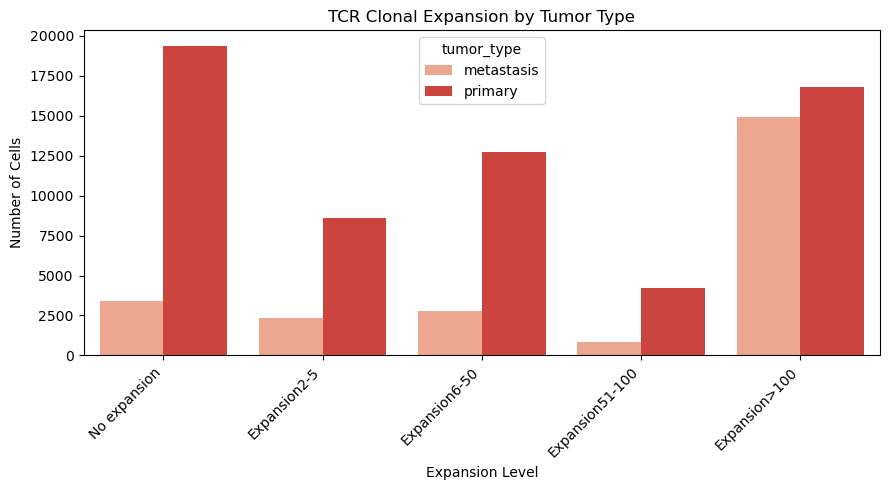

In [57]:
fig, ax = plt.subplots(figsize=(9, 5))

sns.barplot(
    data=plot_df,
    x='expansion_level',
    y='Cell Count',
    hue='tumor_type',
    order=order,
    palette='Reds',
    ax=ax
)

ax.set_xlabel('Expansion Level')
ax.set_ylabel('Number of Cells')
ax.set_title('TCR Clonal Expansion by Tumor Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# plt.savefig('expansion_barplot.pdf')
plt.show()


In [42]:
cell_subtypes_mod = [
    'GZMK+ Tex',
    'ITGAE+ Tex',
    'XBP1+ Tex',
    'Tn',
    'Tcm',
    'Early Tcm/Tem',
    'GZMK+ Tem',
    'GNLY+ Temra',
    'CMC1+ Temra',
    'ZNF683+ Teff',
    'MAIT',
    'ILTCK',
    'ITGAE+ Trm',
    'CREM+ Trm',
    'ITGB2+ Trm',
    'Tpex',
    'MACF1+ T',
    'Cycling T'
]

In [46]:
## stats of clonotype sharing
def circos_edges(clone_df, subtypes, file_name, specific_subtype=None, 
                 first_index='first', second_index='second'):

    edges = pd.DataFrame([], columns=['source', 'target', 'value'])

    if specific_subtype is not None:
        for i in subtypes:
            clonei_qualified = clone_df[(clone_df[first_index]==specific_subtype) |
                                        (clone_df[second_index]==specific_subtype)]
            clonej_qualified = clonei_qualified[(clonei_qualified[first_index]==i) |
                                                (clonei_qualified[second_index]==i)]
            rows = [specific_subtype, i, len(clonej_qualified)]
            edges.loc[len(edges.index)] = rows
    else:        
        for idx, i in enumerate(subtypes):
            if idx < len(subtypes)-1:
                for j in subtypes[idx+1:]:
                    clonei_qualified = clone_df[(clone_df[first_index]==i) | (clone_df[second_index]==i)]
                    clonej_qualified = clonei_qualified[(clonei_qualified[first_index]==j) | 
                                                        (clonei_qualified[second_index]==j)]
                    rows = [i, j, len(clonej_qualified)]
                    edges.loc[len(edges.index)] = rows
            else: pass
            
    edges = edges[edges.ne(0).all(axis=1)]
    edges.to_csv(file_name, header=True, index=False)
    return edges

In [53]:
#clone_subtype['meta_cell_subset'].unique()


array(['sorted_CD4', 'undetermined', 'normal_CD8', 'ag_specific',
       'PD1_CD8', 'CD39_CD8'], dtype=object)

In [58]:
clone_stumor = clone_subtype[(clone_subtype['disease_type']=='UM')]

In [59]:
clone_stumor

,Tn,Tcm,Early Tcm/Tem,GZMK+ Tem,GNLY+ Temra,CMC1+ Temra,ZNF683+ Teff,MAIT,ILTCK,ITGAE+ Trm,...,disease,meta_cell_subset,disease_type,expansion,dominant,dominant_num,non_dominant_num,sharing_type,first,second
cc_aa_identity,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,UM,sorted_CD4,UM,NoExpanded,CREM+ Trm,1.0,0.0,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,UM,sorted_CD4,UM,NoExpanded,CREM+ Trm,1.0,0.0,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,UM,sorted_CD4,UM,NoExpanded,CREM+ Trm,1.0,0.0,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,UM,sorted_CD4,UM,NoExpanded,GZMK+ Tex,1.0,0.0,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,UM,sorted_CD4,UM,NoExpanded,ITGAE+ Tex,1.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542483,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,UM,sorted_CD4,UM,NoExpanded,Early Tcm/Tem,1.0,0.0,NaN,NaN,NaN
542484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,UM,sorted_CD4,UM,NoExpanded,GZMK+ Tex,1.0,0.0,NaN,NaN,NaN
542485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,UM,sorted_CD4,UM,NoExpanded,Equality,0.0,1.0,NaN,NaN,NaN


In [60]:
# From the notebook - you need to run these first:
clone_stumor = sharing_info(clone_stumor)
clone_stumor = dominant_sharing_info(clone_stumor)

# Now you can run circos_edges
stumor_circos = circos_edges(
    clone_stumor,
    subtypes=cell_subtypes_mod,
    file_name='stumor_clonotype2.csv'
)

/tmp/ipykernel_4138073/1904913907.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Tn' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  clone_info_expanded.loc[clone_info_expanded[i]>=0.2*clone_info_expanded['total'], i]=i
/tmp/ipykernel_4138073/1904913907.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Tcm' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  clone_info_expanded.loc[clone_info_expanded[i]>=0.2*clone_info_expanded['total'], i]=i
/tmp/ipykernel_4138073/1904913907.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Early Tcm/Tem' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  clone_info_expanded.lo

In [55]:
## Figure2D, stats of circos plot
def sanke_plot3(circos_df, column1, column2, column3, file_name):
    circos_df['sg'] = None
    circos_df.loc[circos_df['source'].isin([column1,column2,column3]),'sg'] = 0
    circos_df.loc[circos_df['sg'].isna(),'sg'] = 1

    circos_df['tg'] = None
    circos_df.loc[circos_df['target'].isin([column1,column2,column3]),'tg'] = 0
    circos_df.loc[circos_df['tg'].isna(),'tg'] = 1
    
    circos_df = circos_df[(circos_df['sg']==0)|(circos_df['tg']==0)]

    inter_value12 = int(circos_df[(circos_df['source']==column1) & 
                              (circos_df['target']==column2)].value)
    inter_value13 = int(circos_df[(circos_df['source']==column1) & 
                              (circos_df['target']==column3)].value)
    inter_value23 = int(circos_df[(circos_df['source']==column2) & 
                              (circos_df['target']==column3)].value)
        
    circos_df = circos_df[circos_df['tg']!=0]
    
    col1_num = sum(circos_df[circos_df['source']==column1].value)
    col2_num = sum(circos_df[circos_df['source']==column2].value)
    col3_num = sum(circos_df[circos_df['source']==column3].value)
    
    circos_df['value_raw'] = circos_df['value']
    
    circos_df.loc[circos_df['source']==column1, 'value'] = (
        circos_df.loc[circos_df['source']==column1, 'value']/col1_num
    )*100
    circos_df.loc[circos_df['source']==column2, 'value'] = (
        circos_df.loc[circos_df['source']==column2, 'value']/col1_num
    )*100
    circos_df.loc[circos_df['source']==column3, 'value'] = (
        circos_df.loc[circos_df['source']==column3, 'value']/col1_num
    )*100
    circos_df.to_csv(file_name)
    
    venn_df = [col1_num, col2_num, inter_value12, col3_num, inter_value13, inter_value23, 0]
    
    return circos_df,venn_df

In [56]:
stumor_sanke, stumor_sanke_venn = sanke_plot3(
    stumor_circos, 
    column1='GZMK+ Tex',
    column2='ITGAE+ Tex',
    column3='XBP1+ Tex',
    file_name='stumor_sanke3.csv')
stumor_sanke

/tmp/ipykernel_160926/3567908609.py:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  inter_value12 = int(circos_df[(circos_df['source']==column1) &
/tmp/ipykernel_160926/3567908609.py:15: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  inter_value13 = int(circos_df[(circos_df['source']==column1) &
/tmp/ipykernel_160926/3567908609.py:17: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  inter_value23 = int(circos_df[(circos_df['source']==column2) &
/tmp/ipykernel_160926/3567908609.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.77220077  0.96525097  5.98455598  0.38610039  2.7027027   3.47490347
  1.15830116 45.17374517  

,source,target,value,sg,tg,value_raw
2,GZMK+ Tex,Tn,0.772201,0,1,4
4,GZMK+ Tex,Early Tcm/Tem,0.965251,0,1,5
5,GZMK+ Tex,GZMK+ Tem,5.984556,0,1,31
6,GZMK+ Tex,GNLY+ Temra,0.386100,0,1,2
7,GZMK+ Tex,CMC1+ Temra,2.702703,0,1,14
8,GZMK+ Tex,ZNF683+ Teff,3.474903,0,1,18
11,GZMK+ Tex,ITGAE+ Trm,1.158301,0,1,6
12,GZMK+ Tex,CREM+ Trm,45.173745,0,1,234
13,GZMK+ Tex,ITGB2+ Trm,6.949807,0,1,36
14,GZMK+ Tex,Tpex,23.745174,0,1,123


In [57]:
stumor_sanke_venn


[518, 94, 510, 3, 15, 10, 0]

In [60]:
from matplotlib_venn import venn2, venn3


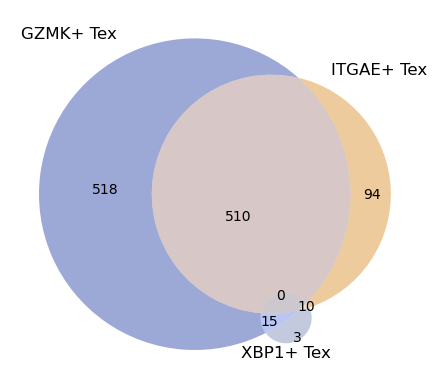

In [61]:
venn3(subsets=stumor_sanke_venn,
      set_labels=['GZMK+ Tex', 'ITGAE+ Tex', 'XBP1+ Tex'],
      set_colors=['#082799', '#d67e09', '#6b7cad'])
plt.savefig('stumor_venn3.pdf')

In [47]:
def tissue_pie_data(adata_use=adata_nogex, 
                    groupby='disease_type', groupby_type='Healthy', 
                    ratioby='cell_subtype_3', 
                    ratioby_type=['ITGAE+ Trm', 'ITGB2+ Trm', 'GZMK+ Tex', 'CXCR6+ Tex'],
                    expanded=True):

    adata = adata_use[adata_use.obs[groupby]==groupby_type]
    
    if expanded == 'large':
        adata_use = adata[
            (adata.obs['expansion_level'].str.contains('100')) |
            (adata.obs['expansion_level'].str.contains('50'))
        ]
    elif expanded == True:
        adata_use = adata[
            adata.obs['cc_aa_identity_size']>=3
        ]
    else:
        adata_use = adata
        
    pie_list = []
    for i in ratioby_type:
        TNum = pd.Series(Counter(adata_use.obs[ratioby])).loc[i]
        pie_list.append(TNum)
        
    OtherNum = len(adata_use.obs)-sum(pie_list)
    pie_list.append(OtherNum)
    
    ratio = len(adata_use.obs)/len(adata.obs)
    return pie_list, ratio

In [ ]:
## Figure2E Stats and Plots
clone_id_name = {
    'GZMK1_ccRCC':90249,
    'GZMK2_NPC':34940,
    'ITGAE1_NPC':103807,
    'ITGAE2_NSCLC':425078,
    'XBP1_PCC':251863,
    'XBP2_PCC':251324,
}

for file_name, clone_id in zip(clone_id_name.keys(),clone_id_name.values()):
    adata_integrated.obs['clone_umap'] = None
    adata_integrated.obs.loc[
        (
            adata_integrated.obs['cc_aa_identity']==clone_id
        ), 'clone_umap'
    ] = adata_integrated.obs.cell_subtype_3_prediction

    ## Figure2E

    fig,ax = plt.subplots(figsize=(5,5))
    sc.pl.umap(adata_integrated, color='clone_umap', palette=subtype_color, 
               size=100, na_color='#f3f3f3', ax=ax)
    fig.savefig('single_clone_'+file_name+'.png', dpi=600)

    subtype_used = np.unique(adata_integrated.obs[~adata_integrated.obs['clone_umap'].isna()]['clone_umap'])
    subtype_used = np.setdiff1d(subtype_used, 'Cycling T')
    clone_pie = tissue_pie_data(adata_use=adata_integrated,
                                groupby='atlas_name', 
                                groupby_type='huARdbv2',
                                ratioby='clone_umap',
                                ratioby_type=subtype_used,
                                expanded=False)
    clone_pie_dict = dict(zip(subtype_used, clone_pie[0][:-1]))
    clone_pie_tuple = sorted(clone_pie_dict.items(), key=lambda item: item[1], reverse=True)
    clone_pie_keys = [x[0] for x in clone_pie_tuple]
    clone_pie_values = [x[1] for x in clone_pie_tuple]

    fig,ax = plt.subplots(figsize=(5,3))
    ax.pie(clone_pie_values, radius=1,
           colors=list(map(subtype_color.get, clone_pie_keys)), 
           autopct='%1.0f%%', pctdistance=1.2)
    fig.savefig('single_clone_'+file_name+'.pie.pdf')
    plt.show()

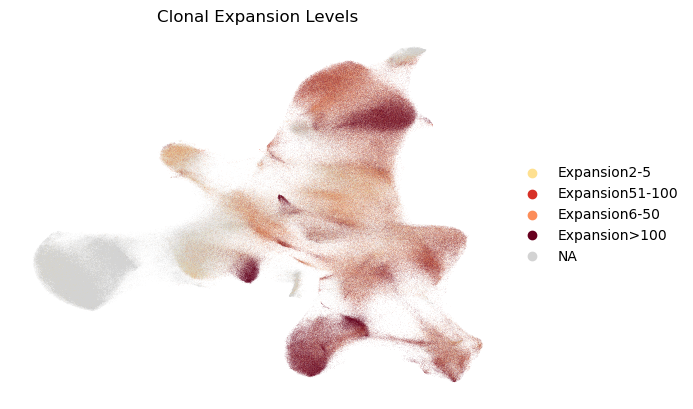

In [49]:
# Plot with expansion level as color, split by disease
sc.pl.umap(
    adata_integrated,
    color='expansion_level',
    groups=['Expansion2-5', 'Expansion6-50', 'Expansion51-100', 'Expansion>100'],
    title='Clonal Expansion Levels',
    palette={'No expansion': 'lightgray', 
             'Expansion2-5': '#fee090',
             'Expansion6-50': '#fc8d59', 
             'Expansion51-100': '#d73027',
             'Expansion>100': '#67001f'},
    frameon=False
)

      source         target  value
0  GZMK+ Tex     ITGAE+ Tex    510
1  GZMK+ Tex      XBP1+ Tex     15
2  GZMK+ Tex             Tn      4
3  GZMK+ Tex  Early Tcm/Tem      5
4  GZMK+ Tex      GZMK+ Tem     31


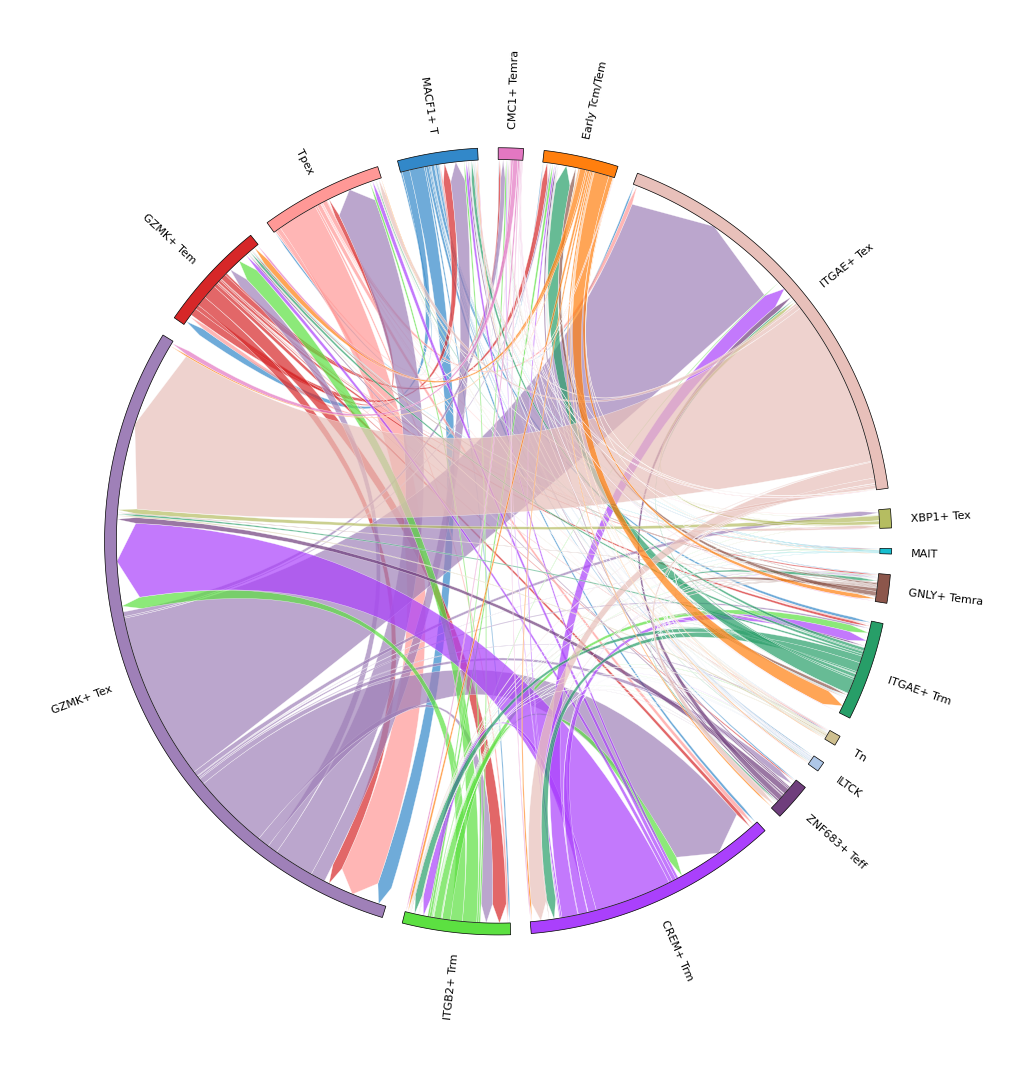

In [57]:
from pycirclize import Circos
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read edges from CSV
edges = pd.read_csv('stumor_clonotype.csv')  # Adjust path as needed

print(edges.head())  # Check the data

# 2. Convert edge list to adjacency matrix
all_subtypes = list(set(edges['source'].tolist() + edges['target'].tolist()))
adjacency = pd.DataFrame(0, index=all_subtypes, columns=all_subtypes)

for _, row in edges.iterrows():
    adjacency.loc[row['source'], row['target']] = row['value']
    adjacency.loc[row['target'], row['source']] = row['value']

# 3. Define colors
subtype_color = {
    'Tn': '#CEBF8F', 'Tcm': '#ffbb78', 'Early Tcm/Tem': '#ff7f0e',
    'GZMK+ Tem': '#d62728', 'GNLY+ Temra': '#8c564b', 'CMC1+ Temra': '#e377c2',
    'ZNF683+ Teff': '#6f3e7c', 'MAIT': '#17becf', 'ILTCK': '#aec7e8',
    'ITGAE+ Trm': '#279e68', 'CREM+ Trm': '#aa40fc', 'ITGB2+ Trm': '#5ce041',
    'Tpex': '#ff9896', 'GZMK+ Tex': '#9f80b8', 'ITGAE+ Tex': '#e8c0ba',
    'XBP1+ Tex': '#b5bd61', 'MACF1+ T': '#3288c9', 'Cycling T': '#f7b6d2'
}

# 4. Create chord diagram
circos = Circos.initialize_from_matrix(
    adjacency,
    space=3,
    cmap=subtype_color,
    label_kws=dict(size=8, r=105, orientation="vertical"),
    link_kws=dict(direction=1, ec="white", lw=0.3, alpha=0.7),
)

# 5. Plot and save
fig = circos.plotfig(figsize=(10, 10))
#plt.title('Clonotype Sharing Between Cell Subtypes', fontsize=14)
#plt.savefig('chord_clonotype_sharing.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
## both code  works, its just that it the upper one is easy to understand. 
## code blocks such as productive TCR etc can be removed  

# # Extract TCR data from obsm['airr']
# tcr_data = adata_integrated2.obsm['airr']

# # Initialize columns with NaN
# tcr_columns = {
#     'IR_VJ_1_v_call': pd.Series(index=adata_nogex2.obs.index, dtype='object'),
#     'IR_VJ_1_j_call': pd.Series(index=adata_nogex2.obs.index, dtype='object'),
#     'IR_VJ_1_junction_aa': pd.Series(index=adata_nogex2.obs.index, dtype='object'),
#     'IR_VJ_1_c_call': pd.Series(index=adata_nogex2.obs.index, dtype='object'),
#     'IR_VDJ_1_v_call': pd.Series(index=adata_nogex2.obs.index, dtype='object'),
#     'IR_VDJ_1_j_call': pd.Series(index=adata_nogex2.obs.index, dtype='object'),
#     'IR_VDJ_1_junction_aa': pd.Series(index=adata_nogex2.obs.index, dtype='object'),
#     'IR_VDJ_1_c_call': pd.Series(index=adata_nogex2.obs.index, dtype='object'),
# }

# # Process each cell's TCR data
# for idx in range(len(tcr_data)):
#     cell_tcrs = tcr_data[idx]
    
#     # Skip if no TCR data
#     if cell_tcrs is None or len(cell_tcrs) == 0:
#         continue
    
#     # Separate TRA/TRG (VJ) and TRB/TRD (VDJ) chains
#     tra_chains = []
#     trb_chains = []
    
#     for tcr_idx in range(len(cell_tcrs)):
#         tcr = cell_tcrs[tcr_idx]
        
#         # Get locus value
#         locus = str(tcr.locus) if hasattr(tcr, 'locus') else ''
        
#         # Alpha/Gamma chains (VJ)
#         if locus in ['TRA', 'TRG']:
#             tra_chains.append(tcr)
#         # Beta/Delta chains (VDJ)
#         elif locus in ['TRB', 'TRD']:
#             trb_chains.append(tcr)
    
#     # Get dominant TRA/TRG chain (first productive or first available)
#     if tra_chains:
#         dominant_tra = None
#         # Prefer productive chains
#         for chain in tra_chains:
#             if hasattr(chain, 'productive') and chain.productive:
#                 dominant_tra = chain
#                 break
#         if dominant_tra is None:
#             dominant_tra = tra_chains[0]
        
#         tcr_columns['IR_VJ_1_v_call'].iloc[idx] = str(dominant_tra.v_call) if hasattr(dominant_tra, 'v_call') and dominant_tra.v_call is not None else None
#         tcr_columns['IR_VJ_1_j_call'].iloc[idx] = str(dominant_tra.j_call) if hasattr(dominant_tra, 'j_call') and dominant_tra.j_call is not None else None
#         tcr_columns['IR_VJ_1_junction_aa'].iloc[idx] = str(dominant_tra.junction_aa) if hasattr(dominant_tra, 'junction_aa') and dominant_tra.junction_aa is not None else None
#         tcr_columns['IR_VJ_1_c_call'].iloc[idx] = str(dominant_tra.c_call) if hasattr(dominant_tra, 'c_call') and dominant_tra.c_call is not None else None
    
#     # Get dominant TRB/TRD chain (first productive or first available)
#     if trb_chains:
#         dominant_trb = None
#         # Prefer productive chains
#         for chain in trb_chains:
#             if hasattr(chain, 'productive') and chain.productive:
#                 dominant_trb = chain
#                 break
#         if dominant_trb is None:
#             dominant_trb = trb_chains[0]
        
#         tcr_columns['IR_VDJ_1_v_call'].iloc[idx] = str(dominant_trb.v_call) if hasattr(dominant_trb, 'v_call') and dominant_trb.v_call is not None else None
#         tcr_columns['IR_VDJ_1_j_call'].iloc[idx] = str(dominant_trb.j_call) if hasattr(dominant_trb, 'j_call') and dominant_trb.j_call is not None else None
#         tcr_columns['IR_VDJ_1_junction_aa'].iloc[idx] = str(dominant_trb.junction_aa) if hasattr(dominant_trb, 'junction_aa') and dominant_trb.junction_aa is not None else None
#         tcr_columns['IR_VDJ_1_c_call'].iloc[idx] = str(dominant_trb.c_call) if hasattr(dominant_trb, 'c_call') and dominant_trb.c_call is not None else None

# # Add all columns to adata.obs
# for col_name, col_data in tcr_columns.items():
#     adata_nogex2.obs[col_name] = col_data

# # Verify the additions
# print("New TCR columns added to adata_nogex2.obs:")
# print([col for col in adata_nogex2.obs.columns if col.startswith('IR_')])

# print(f"\nNumber of cells with TRA/TRG data: {adata_nogex2.obs['IR_VJ_1_v_call'].notna().sum()}")
# print(f"Number of cells with TRB/TRD data: {adata_nogex2.obs['IR_VDJ_1_v_call'].notna().sum()}")

# print(f"\nExample data:")
# tcr_cols = [col for col in adata_integrated2.obs.columns if col.startswith('IR_')]
# print(adata_nogex2.obs[tcr_cols].head(10))


In [47]:
## multi boxplot
def multi_boxplot(multi_box, file_name,
                  xaxis='variable', yaxis='value', hueaxis='origin', 
                  palette_list=disease_type_color.values()):
    
    fig,ax = plt.subplots(figsize=(10,8))
    
    sns.boxplot(x=xaxis, y=yaxis, hue=hueaxis, data=multi_box, 
                palette=palette_list,
                linewidth=0.5, boxprops={"zorder":2},
                showfliers=False, ax=ax)
    
    num = len(multi_box[hueaxis].unique())
    ## Extract x and y coordinates of the dots
    sns.stripplot(x=xaxis, y=yaxis, hue=hueaxis, 
                  palette=palette_list, jitter=True,
                  size=5,
                  linewidth=1, edgecolor='black',
                  dodge=0.5 / num * (num - 1),
                  data=multi_box, ax=ax)
            
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.legend(bbox_to_anchor=(1.3, 0.5), loc='center right')
    fig.autofmt_xdate(rotation=45)
    
    fig.savefig(file_name)
    plt.show()

/tmp/ipykernel_3701656/1932554759.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_um.obs['tumor_type'] = np.where(


In [73]:
def cbind_df_single(adata, xaxis, xaxis_label, index_type, 
                    split_col='tissue_type',  # Column containing tumor/metastasis info
                    group1='Tumor', 
                    group2='Metastasis', 
                    ind=True):
    """
    Calculate D50 or Gini for one adata, split by a categorical column (e.g., tumor vs metastasis)
    """
    
    # Split adata by the grouping column
    adata_group1 = adata[adata.obs[split_col] == group1]
    adata_group2 = adata[adata.obs[split_col] == group2]
    
    if index_type == 'D50':
        df1 = clone_D50(adata_group1, xaxis=xaxis, xaxis_label=xaxis_label, ind=ind)
        df2 = clone_D50(adata_group2, xaxis=xaxis, xaxis_label=xaxis_label, ind=ind)
    else:
        df1 = clone_gini(adata_group1, xaxis=xaxis, xaxis_label=xaxis_label, ind=ind)
        df2 = clone_gini(adata_group2, xaxis=xaxis, xaxis_label=xaxis_label, ind=ind)
        
    df1['origin'] = group1
    df2['origin'] = group2
    
    multi_box = pd.concat([df1, df2], axis=0)
    multi_box = multi_box.rename(columns={multi_box.columns[0]: "value", multi_box.columns[1]: "variable"})
    
    multi_box["variable"] = multi_box["variable"].astype('category')
    multi_box["variable"] = multi_box["variable"].cat.reorder_categories(xaxis)
    
    return multi_box

In [80]:
adata_integrated.obs

,treatment,Annotation,disease,study_name,atlas_name,disease_type,sample_name,treatment_group,cell_subtype_3,n_counts,...,IR_VDJ_1_junction_aa,Cartridge,meta_tissue_type,meta_cell_subset,tcr,cc_aa_identity,cc_aa_identity_size,expansion_level,expansion_size,tumor_type
53314-A4069-Cartridge-I3-Berlin-UM,NaN,CD8 T-Cells - Checkpoint Proteins,UM,uveal_melanoma,um_berlin,UM,DU_050,naive,undefined,1082,...,,A4069-Cartridge-I3,TIL,Cd45_pos,ALGVSGGYNKLI--TRAV9-2-TRAJ4---DU_050,12270,1.0,No expansion,1,primary
60757-A4069-Cartridge-I3-Berlin-UM,NaN,CD8 T-Cells - Checkpoint Proteins,UM,uveal_melanoma,um_berlin,UM,DU_050,naive,undefined,736,...,ASSYTIDRLNTEAF,A4069-Cartridge-I3,TIL,Cd45_pos,GNLI-ASSYTIDRLNTEAF-TRAV14-DV4-TRAJ42-TRBV6-2-...,539819,26.0,Expansion6-50,Larger3,primary
73218-A4069-Cartridge-I3-Berlin-UM,NaN,CD8 T-Cells - Checkpoint Proteins,UM,uveal_melanoma,um_berlin,UM,DU_050,naive,undefined,1025,...,ASSLERELF,A4069-Cartridge-I3,TIL,Cd45_pos,ALSGPVNMNTGFQKLV-ASSLERELF-TRAV19-TRAJ8-TRBV11...,13091,32.0,Expansion6-50,Larger3,primary
82365-A4069-Cartridge-I3-Berlin-UM,NaN,CD8 T-Cells - Checkpoint Proteins,UM,uveal_melanoma,um_berlin,UM,DU_050,naive,undefined,1377,...,ASSPGAGNTIY,A4069-Cartridge-I3,TIL,Cd45_pos,-ASSPGAGNTIY---TRBV6-5-TRBJ1-3-DU_050,3988,9.0,Expansion6-50,Larger3,primary
90127-A4069-Cartridge-I3-Berlin-UM,NaN,CD8 T-Cells - Cycling,UM,uveal_melanoma,um_berlin,UM,DU_050,naive,undefined,1746,...,ASSYTIDRLNTEAF,A4069-Cartridge-I3,TIL,Cd45_pos,AMREGLSGGSNYKLT-ASSYTIDRLNTEAF-TRAV14-DV4-TRAJ...,13796,27.0,Expansion6-50,Larger3,primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTAGTTCAGCTAAACA-Simone_2021-AS02_SF,NSAIDs,undefined,Ankylosing spondylitis,Simone_2021,huARdbv2,Inflammation,AS02_SF,undefined,GZMK+ Tex,499,...,CASSAGAGGADTQYF,NaN,Inflamed Tissue,CD45RA-MemoryTreg,CAFLDDQGGKLIF-CASSAGAGGADTQYF-TRAV24-TRAJ23-TR...,115080,11.0,Expansion6-50,Larger3,metastasis
TTCCCAGCAATGCCAT-Simone_2021-AS02_SF,NSAIDs,undefined,Ankylosing spondylitis,Simone_2021,huARdbv2,Inflammation,AS02_SF,undefined,GZMK+ Tem,551,...,CASSWGQSYEQYF,NaN,Inflamed Tissue,CD45RA-MemoryTreg,CATHGDSGYALNF-CASSWGQSYEQYF-TRAV17-TRAJ41-TRBV...,272404,17.0,Expansion6-50,Larger3,metastasis
TTCGAAGAGCTAACTC-Simone_2021-AS02_SF,NSAIDs,undefined,Ankylosing spondylitis,Simone_2021,huARdbv2,Inflammation,AS02_SF,undefined,Tcm,1016,...,CASSYWGDQPQHF,NaN,Inflamed Tissue,CD45RA-MemoryTreg,CAASTAQGGSEKLVF-CASSYWGDQPQHF-TRAV23DV6-TRAJ57...,75498,1.0,No expansion,1,metastasis
TTGCCGTCAATGCCAT-Simone_2021-AS02_SF,NSAIDs,undefined,Ankylosing spondylitis,Simone_2021,huARdbv2,Inflammation,AS02_SF,undefined,GZMK+ Tex,1340,...,CASTTGEYQPQHF,NaN,Inflamed Tissue,CD45RA-MemoryTreg,CAVGNTDKLIF-CASTTGEYQPQHF-TRAV39-TRAJ34-TRBV28...,308710,1.0,No expansion,1,metastasis


In [ ]:
disease_types = adata_integrated.obs['disease_type'].unique()

# Example: Split by tumor vs metastasis
result = cbind_df_single(
    adata_um,
    xaxis=disease_types,
    xaxis_label='disease_type',
    index_type='D50',
    split_col='tissue_type',      # Your column name
    group1='primary',       # Value for tumor
    group2='metastasis',          # Value for metastasis
    ind=True
)

In [ ]:
d50_disease = disease_df_by_tissue(
    adata=adata_integrated,
    xaxis=disease_types,
    xaxis_label='disease_type',
    index_type='D50',
    tissue_col='tumor_type'
)


In [67]:
adata_integrated

AnnData object with n_obs × n_vars = 1210559 × 3848
    obs: 'treatment', 'Annotation', 'disease', 'study_name', 'atlas_name', 'disease_type', 'sample_name', 'treatment_group', 'cell_subtype_3', 'n_counts', 'cell_subtype_3_prediction', 'cell_subtype_zheng_2021_prediction', 'Sample', 'Sample_Name', 'Dataset', 'IR_VJ_1_v_call', 'IR_VJ_1_j_call', 'IR_VJ_1_junction_aa', 'IR_VDJ_1_v_call', 'IR_VDJ_1_j_call', 'IR_VDJ_1_junction_aa', 'Cartridge', 'meta_tissue_type', 'meta_cell_subset', 'tcr', 'cc_aa_identity', 'cc_aa_identity_size', 'expansion_level', 'expansion_size', 'tumor_type'
    uns: 'cell_subtype_3_prediction_logits'
    obsm: 'X_gex', 'X_umap'

In [ ]:
multi_boxplot(
    d50_disease,
    xaxis='variable',
    yaxis='value',
    hueaxis='tumor_type',
    file_name='d50_disease_primary_vs_metastasis.pdf'
)


In [62]:
multi_boxplot(d50_disease, 
              xaxis='origin', yaxis='value', hueaxis='variable', 
              file_name='d50_disease.pdf')

NameError: name 'tumor_type' is not defined

View of AnnData object with n_obs × n_vars = 86022 × 3848
    obs: 'treatment', 'Annotation', 'disease', 'study_name', 'atlas_name', 'disease_type', 'sample_name', 'treatment_group', 'cell_subtype_3', 'n_counts', 'cell_subtype_3_prediction', 'cell_subtype_zheng_2021_prediction', 'Sample', 'Sample_Name', 'Dataset', 'IR_VJ_1_v_call', 'IR_VJ_1_j_call', 'IR_VJ_1_junction_aa', 'IR_VDJ_1_v_call', 'IR_VDJ_1_j_call', 'IR_VDJ_1_junction_aa', 'Cartridge', 'meta_tissue_type', 'meta_cell_subset', 'tcr', 'cc_aa_identity', 'cc_aa_identity_size', 'expansion_level', 'expansion_size', 'tumor_type'
    uns: 'cell_subtype_3_prediction_logits'
    obsm: 'X_gex', 'X_umap'

In [59]:
# import pandas as pd

# airr_df = pd.DataFrame(
#     {
#         ("VJ_1", "v_call"): adata_integrated.obs["IR_VJ_1_v_call"],
#         ("VJ_1", "j_call"): adata_integrated.obs["IR_VJ_1_j_call"],
#         ("VJ_1", "junction_aa"): adata_integrated.obs["IR_VJ_1_junction_aa"],
#         ("VDJ_1", "v_call"): adata_integrated.obs["IR_VDJ_1_v_call"],
#         ("VDJ_1", "j_call"): adata_integrated.obs["IR_VDJ_1_j_call"],
#         ("VDJ_1", "junction_aa"): adata_integrated.obs["IR_VDJ_1_junction_aa"],
#     },
#     index=adata_integrated.obs_names
# )

# airr_df.columns = pd.MultiIndex.from_tuples(
#     airr_df.columns, names=["chain", "field"]
# )


In [45]:
# tcr_df = adata_integrated.obs[[
#     'IR_VJ_1_v_call', 'IR_VJ_1_j_call', 'IR_VJ_1_junction_aa',
#     'IR_VDJ_1_v_call', 'IR_VDJ_1_j_call', 'IR_VDJ_1_junction_aa'
# ]].copy()


In [46]:
# airr_records = []
# for cell_id in tcr_df.index:
#     # VJ_1 chain (alpha)
#     if pd.notna(tcr_df.loc[cell_id, 'IR_VJ_1_junction_aa']):
#         airr_records.append({
#             'cell_id': cell_id,
#             'v_call': tcr_df.loc[cell_id, 'IR_VJ_1_v_call'],
#             'j_call': tcr_df.loc[cell_id, 'IR_VJ_1_j_call'],
#             'junction_aa': tcr_df.loc[cell_id, 'IR_VJ_1_junction_aa'],
#             'locus': 'TRA'  # or infer from v_call
#         })
    
#     # VDJ_1 chain (beta)
#     if pd.notna(tcr_df.loc[cell_id, 'IR_VDJ_1_junction_aa']):
#         airr_records.append({
#             'cell_id': cell_id,
#             'v_call': tcr_df.loc[cell_id, 'IR_VDJ_1_v_call'],
#             'j_call': tcr_df.loc[cell_id, 'IR_VDJ_1_j_call'],
#             'junction_aa': tcr_df.loc[cell_id, 'IR_VDJ_1_junction_aa'],
#             'locus': 'TRB'  # or infer from v_call
#         })

# airr_df = pd.DataFrame(airr_records)

In [47]:
airr_df

,cell_id,v_call,j_call,junction_aa,locus
0,53314-A4069-Cartridge-I3-Berlin-UM,TRAV9-2,TRAJ4,ALGVSGGYNKLI,TRA
1,53314-A4069-Cartridge-I3-Berlin-UM,,,,TRB
2,60757-A4069-Cartridge-I3-Berlin-UM,TRAV14-DV4,TRAJ42,GNLI,TRA
3,60757-A4069-Cartridge-I3-Berlin-UM,TRBV6-2,TRBJ1-1,ASSYTIDRLNTEAF,TRB
4,73218-A4069-Cartridge-I3-Berlin-UM,TRAV19,TRAJ8,ALSGPVNMNTGFQKLV,TRA
...,...,...,...,...,...
2371323,TTCGAAGAGCTAACTC-Simone_2021-AS02_SF,TRBV6-2,TRBJ1-5,CASSYWGDQPQHF,TRB
2371324,TTGCCGTCAATGCCAT-Simone_2021-AS02_SF,TRAV39,TRAJ34,CAVGNTDKLIF,TRA
2371325,TTGCCGTCAATGCCAT-Simone_2021-AS02_SF,TRBV28,TRBJ1-5,CASTTGEYQPQHF,TRB
2371326,TTGCGTCTCGGATGTT-Simone_2021-AS02_SF,TRAV29DV5,TRAJ37,CAANSPSSNTGKLIF,TRA


In [58]:
import awkward as ak
import pandas as pd

# Step 1: Build nested structure for each cell
airr_data = []

for cell_id in adata_integrated.obs_names:
    cell_chains = []
    
    # Add VJ_1 chain if it exists
    if pd.notna(adata_integrated.obs.loc[cell_id, 'IR_VJ_1_junction_aa']):
        cell_chains.append({
            'v_call': adata_integrated.obs.loc[cell_id, 'IR_VJ_1_v_call'],
            'j_call': adata_integrated.obs.loc[cell_id, 'IR_VJ_1_j_call'],
            'junction_aa': adata_integrated.obs.loc[cell_id, 'IR_VJ_1_junction_aa'],
            'locus': 'TRA',  # Adjust based on your data
            'productive': True,  # Add if you have this info
            'consensus_count': 1  # Add UMI count if available
        })
    
    # Add VDJ_1 chain if it exists
    if pd.notna(adata_integrated.obs.loc[cell_id, 'IR_VDJ_1_junction_aa']):
        cell_chains.append({
            'v_call': adata_integrated.obs.loc[cell_id, 'IR_VDJ_1_v_call'],
            'j_call': adata_integrated.obs.loc[cell_id, 'IR_VDJ_1_j_call'],
            'junction_aa': adata_integrated.obs.loc[cell_id, 'IR_VDJ_1_junction_aa'],
            'locus': 'TRB',  # Adjust based on your data
            'productive': True,
            'consensus_count': 1
        })
    
    airr_data.append(cell_chains)

# Step 2: Convert to awkward array
adata_integrated.obsm['airr'] = ak.Array(airr_data)

# Step 3: Create chain indices
ir.pp.index_chains(adata_integrated)


In [59]:
adata_integrated

AnnData object with n_obs × n_vars = 1210559 × 3848
    obs: 'treatment', 'Annotation', 'disease', 'study_name', 'atlas_name', 'disease_type', 'sample_name', 'treatment_group', 'cell_subtype_3', 'n_counts', 'cell_subtype_3_prediction', 'cell_subtype_zheng_2021_prediction', 'Sample', 'Sample_Name', 'Dataset', 'IR_VJ_1_v_call', 'IR_VJ_1_j_call', 'IR_VJ_1_junction_aa', 'IR_VDJ_1_v_call', 'IR_VDJ_1_j_call', 'IR_VDJ_1_junction_aa', 'Cartridge', 'meta_tissue_type', 'meta_cell_subset', 'tcr', 'cc_aa_identity', 'cc_aa_identity_size', 'expansion_level', 'expansion_size'
    uns: 'cell_subtype_3_prediction_logits', 'chain_indices'
    obsm: 'X_gex', 'X_umap', 'airr', 'chain_indices'

In [54]:
import scirpy as ir
import pandas as pd

# Download VDJdb (or load local copy)
# From: https://vdjdb.cdr3.net/
vdjdb = ir.datasets.vdjdb()

Processing VDJDB entries:   0%|          | 0/110573 [00:00<?, ?it/s]/omics/odcf/analysis/hipo/hipo_021/Rhode/environments/anndata2/lib/python3.11/site-packages/airr/schema.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream
Processing VDJDB entries: 100%|██████████| 110573/110573 [00:21<00:00, 5183.59it/s]


In [ ]:
# import scirpy as ir

# # 1. Check for cells with valid TCR data
# print("Before filtering:", adata_integrated.n_obs)

# # Filter to cells that have valid TCR sequences (non-empty CDR3)
# # Check which column contains your CDR3 - usually in the airr format
# adata_tcr = adata_integrated[
#     adata_integrated.obs['IR_VDJ_1_junction_aa'].notna() & 
#     (adata_integrated.obs['IR_VDJ_1_junction_aa'] != '')
# ].copy()

# print("After filtering:", adata_tcr.n_obs)

# # 2. Re-index chains to ensure proper format
# ir.pp.index_chains(adata_tcr)

# # 3. Load VDJdb
# vdjdb = ir.datasets.vdjdb()

# # 4. Calculate distance matrix separately
# ir.pp.ir_dist(adata_tcr, metric="identity", sequence="aa")
# ir.pp.ir_dist(vdjdb, metric="identity", sequence="aa")

# # 5. Now query
# ir.tl.ir_query(
#     adata_tcr, 
#     vdjdb,
#     metric="identity",
#     sequence="aa",
#     receptor_arms="VDJ",  # Try VDJ only first
#     dual_ir="primary_only"
# )

# # Check matches
# print(adata_tcr.obs['ir_query_antigen'].value_counts())

In [ ]:
# Or load from file
# vdjdb = pd.read_csv('vdjdb.tsv', sep='\t')

# Query your TCRs against VDJdb
# ir.pp.ir_dist(adata_integrated, vdjdb, metric="identity", sequence="aa")
# ir.tl.ir_query(
#     adata_integrated, 
#     vdjdb,
#     metric="identity",
#     sequence="aa",
#     receptor_arms="all",
#     dual_ir="any"
# )

# # Check matches
# print(adata_nogex.obs['ir_query_antigen'].value_counts())

In [ ]:

# ir.tl.define_clonotypes(
#     adata_integrated,
#     sequence="junction_aa"
# )


In [43]:
import scirpy as ir
from scirpy.io import AirrCell
import pandas as pd

airr_cells = []

for cell_id, row in adata_integrated.obs.iterrows():
    cell = AirrCell(cell_id=cell_id)

    # TRA chain (VJ)
    if not pd.isna(row["IR_VJ_1_junction_aa"]):
        chain = cell.empty_chain_dict()
        chain["locus"] = "TRA"
        chain["junction_aa"] = row["IR_VJ_1_junction_aa"]
        chain["v_call"] = row["IR_VJ_1_v_call"]
        chain["j_call"] = row["IR_VJ_1_j_call"]
        chain["productive"] = True   # 👈 IMPORTANT
        cell.add_chain(chain)

    # TRB chain (VDJ)
    if not pd.isna(row["IR_VDJ_1_junction_aa"]):
        chain = cell.empty_chain_dict()
        chain["locus"] = "TRB"
        chain["junction_aa"] = row["IR_VDJ_1_junction_aa"]
        chain["v_call"] = row["IR_VDJ_1_v_call"]
        chain["j_call"] = row["IR_VDJ_1_j_call"]
        chain["productive"] = True   # 👈 IMPORTANT
        cell.add_chain(chain)

    airr_cells.append(cell)


/omics/odcf/analysis/hipo/hipo_021/Rhode/environments/anndata2/lib/python3.11/site-packages/airr/schema.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream


In [44]:
airr_adata = ir.io.from_airr_cells(airr_cells)
airr_adata

AnnData object with n_obs × n_vars = 1210559 × 0
    uns: 'scirpy_version'
    obsm: 'airr'

In [45]:
adata_integrated.obsm["airr"] = airr_adata.obsm["airr"]


In [58]:
adata_integrated

AnnData object with n_obs × n_vars = 1210559 × 3848
    obs: 'treatment', 'Annotation', 'disease', 'study_name', 'atlas_name', 'disease_type', 'sample_name', 'treatment_group', 'cell_subtype_3', 'n_counts', 'cell_subtype_3_prediction', 'cell_subtype_zheng_2021_prediction', 'Sample', 'Sample_Name', 'Dataset', 'IR_VJ_1_v_call', 'IR_VJ_1_j_call', 'IR_VJ_1_junction_aa', 'IR_VDJ_1_v_call', 'IR_VDJ_1_j_call', 'IR_VDJ_1_junction_aa', 'Cartridge', 'meta_tissue_type', 'meta_cell_subset', 'tcr', 'cc_aa_identity', 'cc_aa_identity_size', 'expansion_level', 'expansion_size'
    uns: 'cell_subtype_3_prediction_logits'
    obsm: 'X_gex', 'X_umap', 'airr'

In [46]:
ir.pp.ir_dist(adata_integrated, sequence="aa")


In [47]:
ir.tl.chain_qc(adata_integrated)


In [48]:
ir.tl.define_clonotype_clusters(
    adata_integrated, sequence="aa", receptor_arms="all", dual_ir="primary_only"
)

In [49]:
ir.tl.clonotype_network(adata_integrated, min_cells=50, sequence="aa")

In [ ]:
_ = ir.pl.clonotype_network(
    adata_integrated,
    color="sample_name",
    base_size=10,
    label_fontsize=9,
    panel_size=(10, 10),
    legend_fontsize=15,
)

In [60]:
adata_dis = adata_integrated[adata_integrated.obs["disease_type"] == "UM"].copy()

/omics/odcf/analysis/hipo/hipo_021/Rhode/environments/anndata2/lib/python3.11/site-packages/scirpy/pl/_clonotypes.py:179: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if f"X_{basis}" not in params.adata.obsm_keys():


<Axes: >

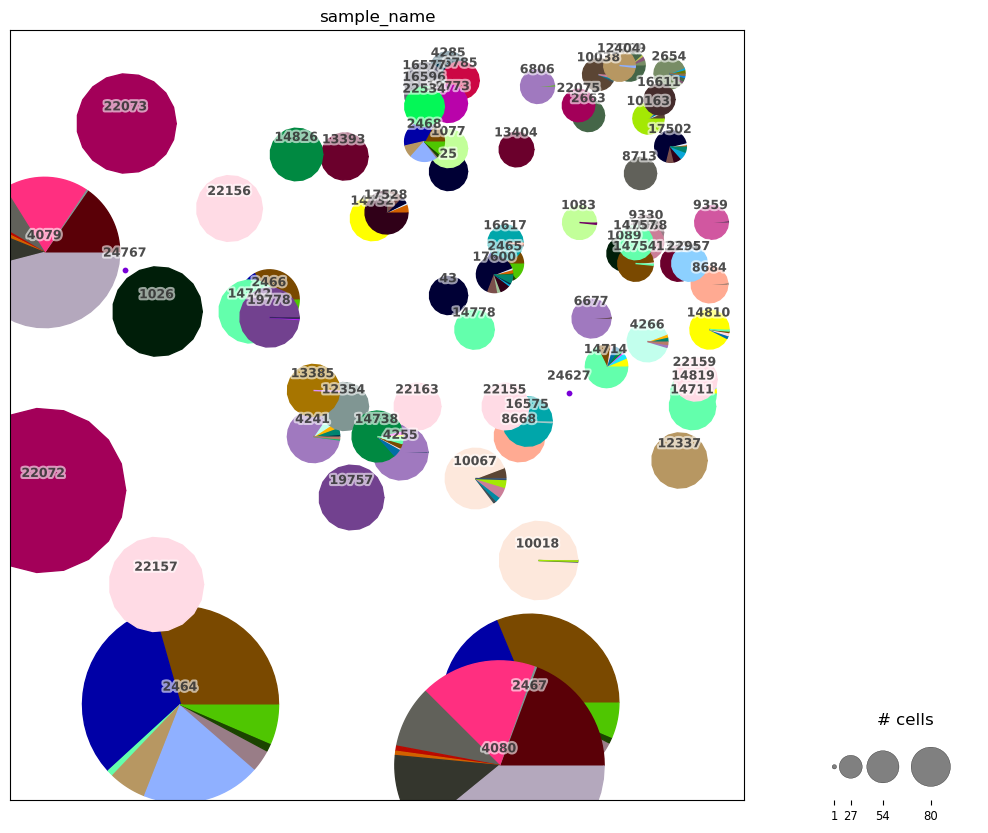

In [71]:
ir.pl.clonotype_network(
    adata_dis,
    color="sample_name",
    base_size=10,
    label_fontsize=9,
    panel_size=(10, 10),
    legend_fontsize=15,
)

In [50]:
adata_integrated.obs["cc_aa_identity"] = adata_integrated.obs["cc_aa_identity"].astype("str")

In [54]:
adata_integrated

AnnData object with n_obs × n_vars = 1210559 × 3848
    obs: 'treatment', 'Annotation', 'disease', 'study_name', 'atlas_name', 'disease_type', 'sample_name', 'treatment_group', 'cell_subtype_3', 'n_counts', 'cell_subtype_3_prediction', 'cell_subtype_zheng_2021_prediction', 'Sample', 'Sample_Name', 'Dataset', 'IR_VJ_1_v_call', 'IR_VJ_1_j_call', 'IR_VJ_1_junction_aa', 'IR_VDJ_1_v_call', 'IR_VDJ_1_j_call', 'IR_VDJ_1_junction_aa', 'Cartridge', 'meta_tissue_type', 'meta_cell_subset', 'tcr', 'cc_aa_identity', 'cc_aa_identity_size', 'expansion_level', 'expansion_size', 'receptor_type', 'receptor_subtype', 'chain_pairing'
    uns: 'cell_subtype_3_prediction_logits', 'chain_indices', 'ir_dist_aa_identity', 'cc_aa_identity', 'clonotype_network'
    obsm: 'X_gex', 'X_umap', 'airr', 'chain_indices', 'X_clonotype_network'

In [58]:
adata_integrated.obs.loc[adata_integrated.obs["cc_aa_identity"] == "4080", :].groupby(
    [
        "IR_VJ_1_junction_aa",
        "IR_VDJ_1_junction_aa",
        "receptor_subtype",
    ],
    observed=True,
).size().reset_index(name="n_cells")

,IR_VJ_1_junction_aa,IR_VDJ_1_junction_aa,receptor_subtype,n_cells
0,AVSMNYGGSQGNLI,SAAPGVSIEQY,TRA+TRB,2271


/omics/odcf/analysis/hipo/hipo_021/Rhode/environments/anndata2/lib/python3.11/site-packages/scirpy/tl/_clonal_expansion.py:111: FutureWarning: The argument `clip_at` is deprecated. Please use `brekpoints` instead.
  warnings.warn("The argument `clip_at` is deprecated. Please use `brekpoints` instead.", category=FutureWarning)


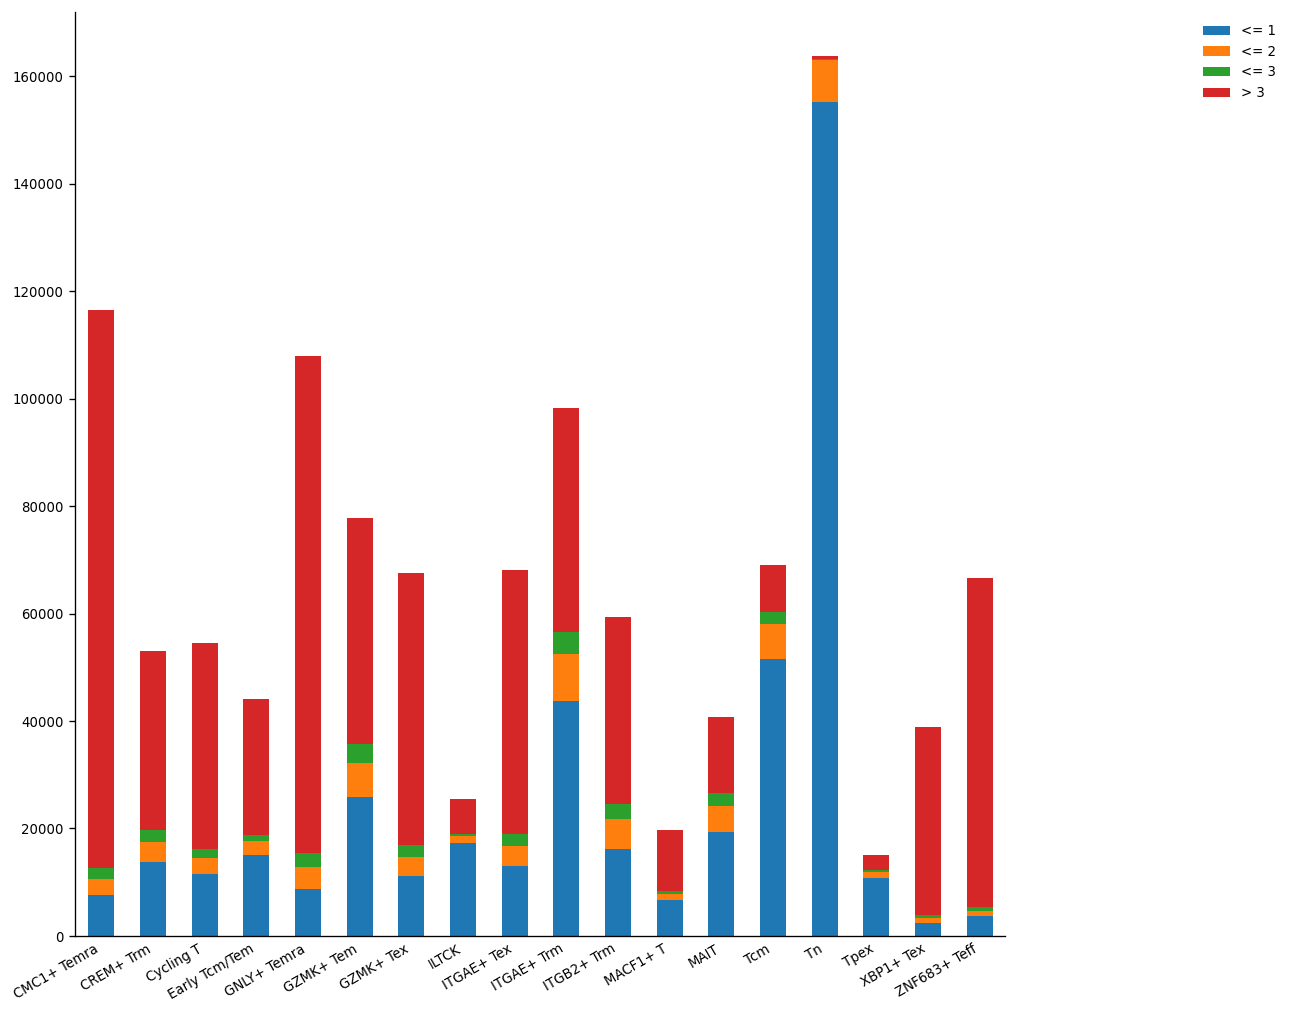

In [55]:
ir.tl.clonal_expansion(adata_integrated, target_col="cc_aa_identity")

_ = ir.pl.clonal_expansion(
    adata_integrated,
    groupby="cell_subtype_3_prediction",
    target_col="cc_aa_identity",
    clip_at=4,
    normalize=False,
    figsize=[10, 10],
)

/omics/odcf/analysis/hipo/hipo_021/Rhode/environments/anndata2/lib/python3.11/site-packages/scirpy/util/__init__.py:457: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return 1 / cast(np.ndarray, obs.groupby(normalize_col)[normalize_col].transform("count").values)


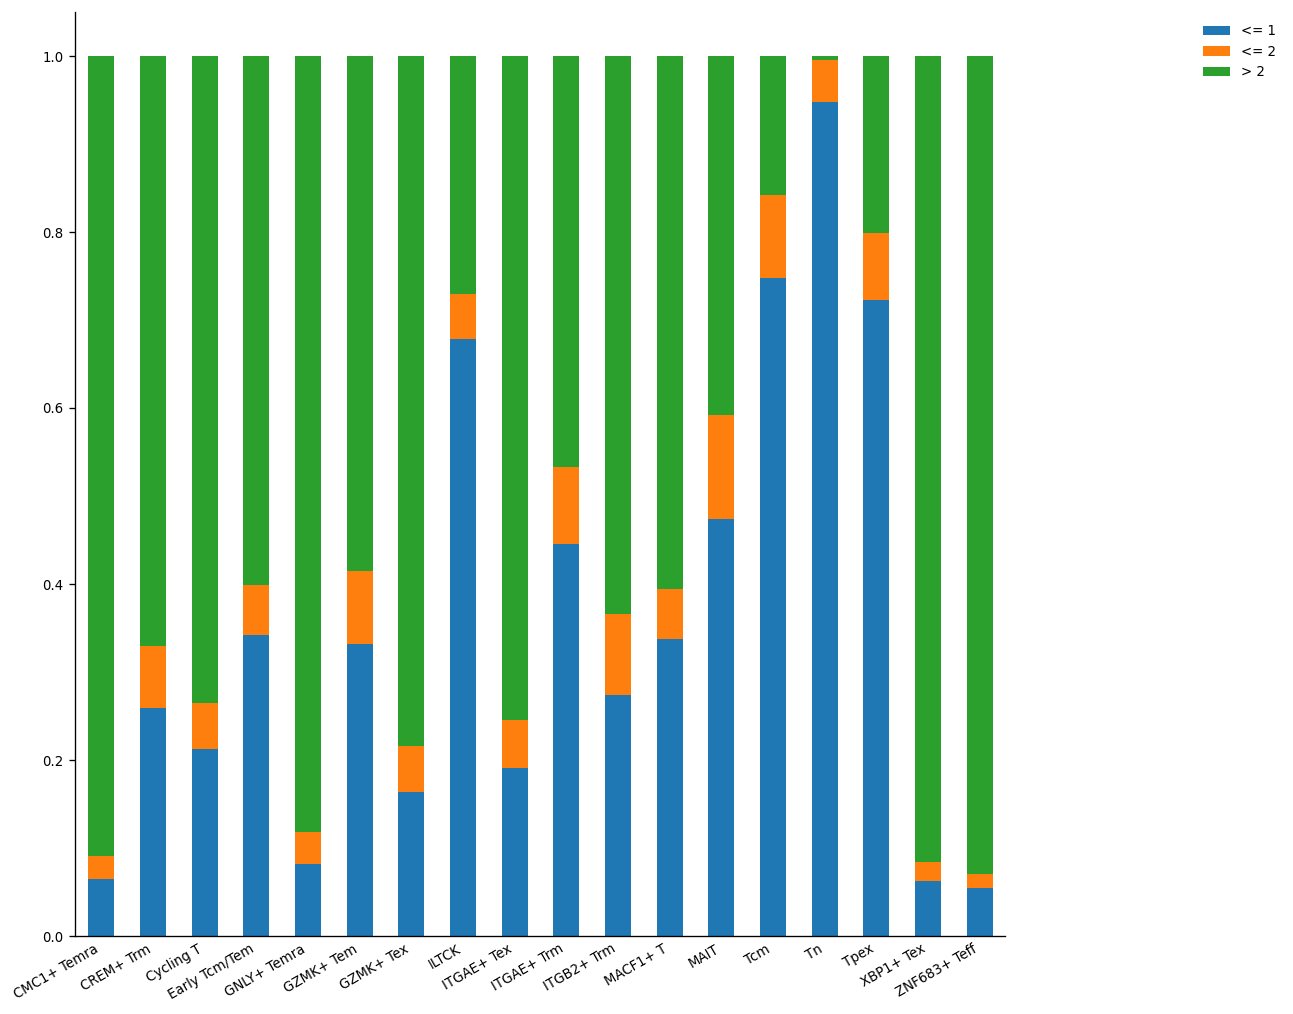

In [56]:
_ = ir.pl.clonal_expansion(
    adata_integrated, "cell_subtype_3_prediction", target_col="cc_aa_identity", figsize=[10, 10]
)

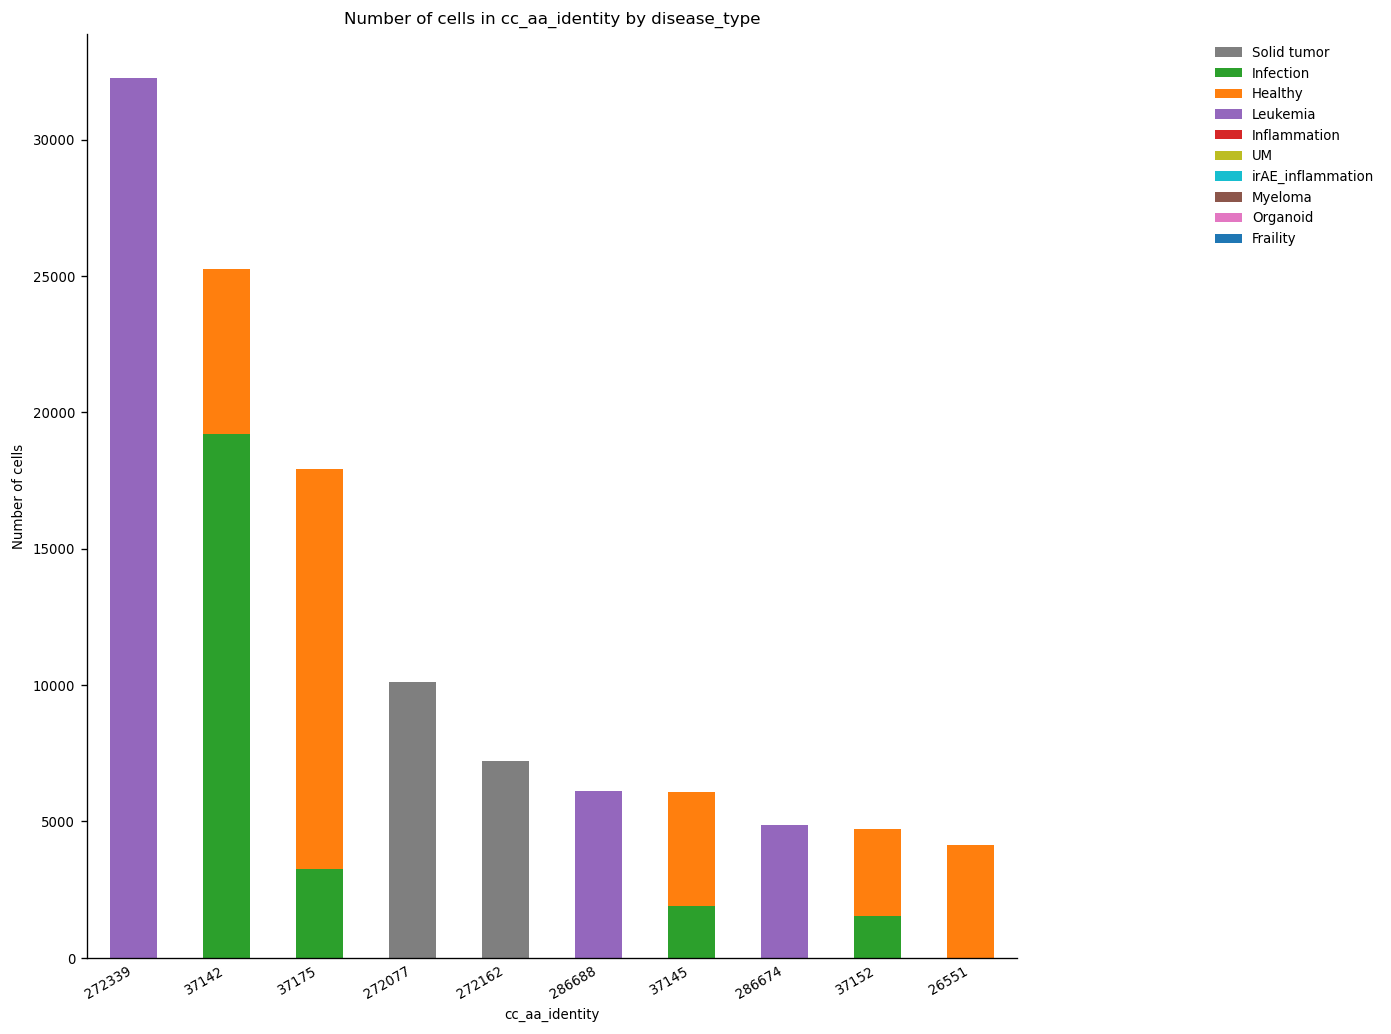

In [59]:
_ = ir.pl.group_abundance(
    adata_integrated,
    groupby="cc_aa_identity",
    target_col="disease_type",
    max_cols=10,
    figsize=[10, 10],
)

In [70]:
adata_dis

AnnData object with n_obs × n_vars = 86022 × 3848
    obs: 'treatment', 'Annotation', 'disease', 'study_name', 'atlas_name', 'disease_type', 'sample_name', 'treatment_group', 'cell_subtype_3', 'n_counts', 'cell_subtype_3_prediction', 'cell_subtype_zheng_2021_prediction', 'Sample', 'Sample_Name', 'Dataset', 'IR_VJ_1_v_call', 'IR_VJ_1_j_call', 'IR_VJ_1_junction_aa', 'IR_VDJ_1_v_call', 'IR_VDJ_1_j_call', 'IR_VDJ_1_junction_aa', 'Cartridge', 'meta_tissue_type', 'meta_cell_subset', 'tcr', 'cc_aa_identity', 'cc_aa_identity_size', 'expansion_level', 'expansion_size', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'clonal_expansion'
    uns: 'cell_subtype_3_prediction_logits', 'chain_indices', 'ir_dist_aa_identity', 'cc_aa_identity', 'clonotype_network', 'cell_subtype_3_prediction_colors', 'disease_type_colors'
    obsm: 'X_gex', 'X_umap', 'airr', 'chain_indices', 'X_clonotype_network'

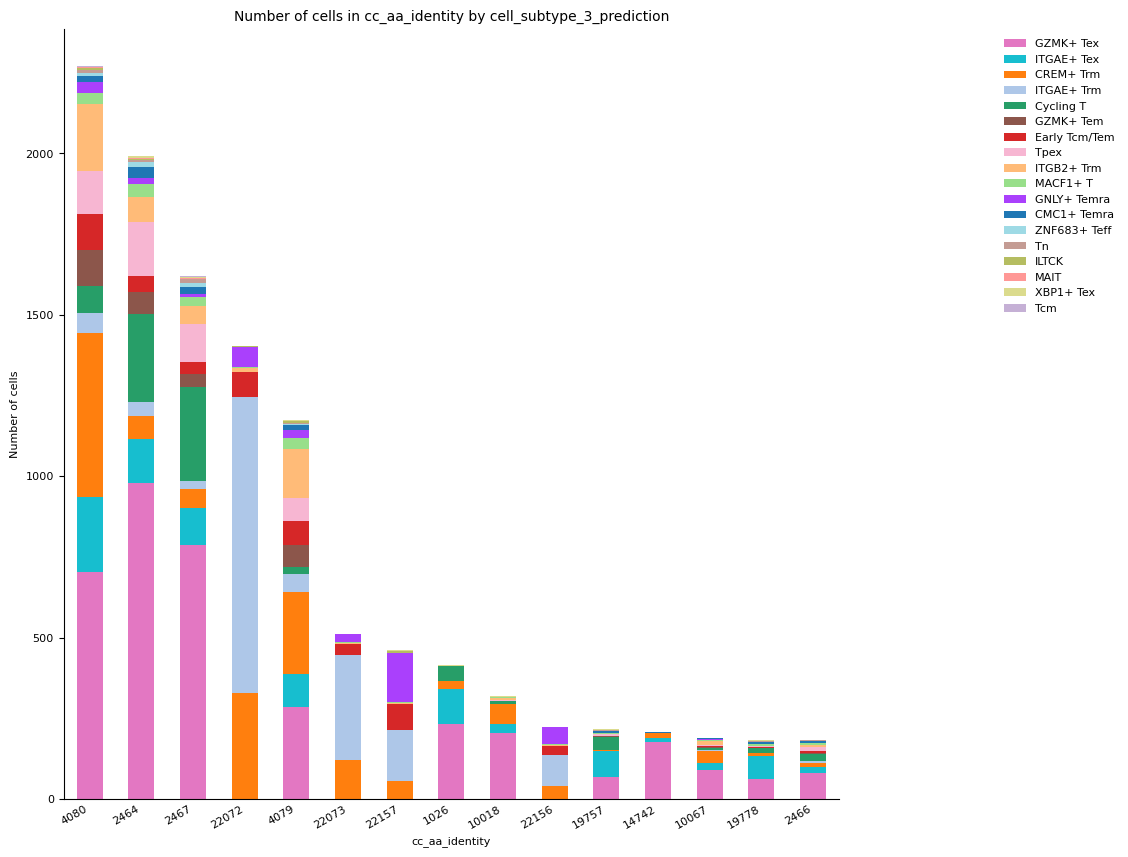

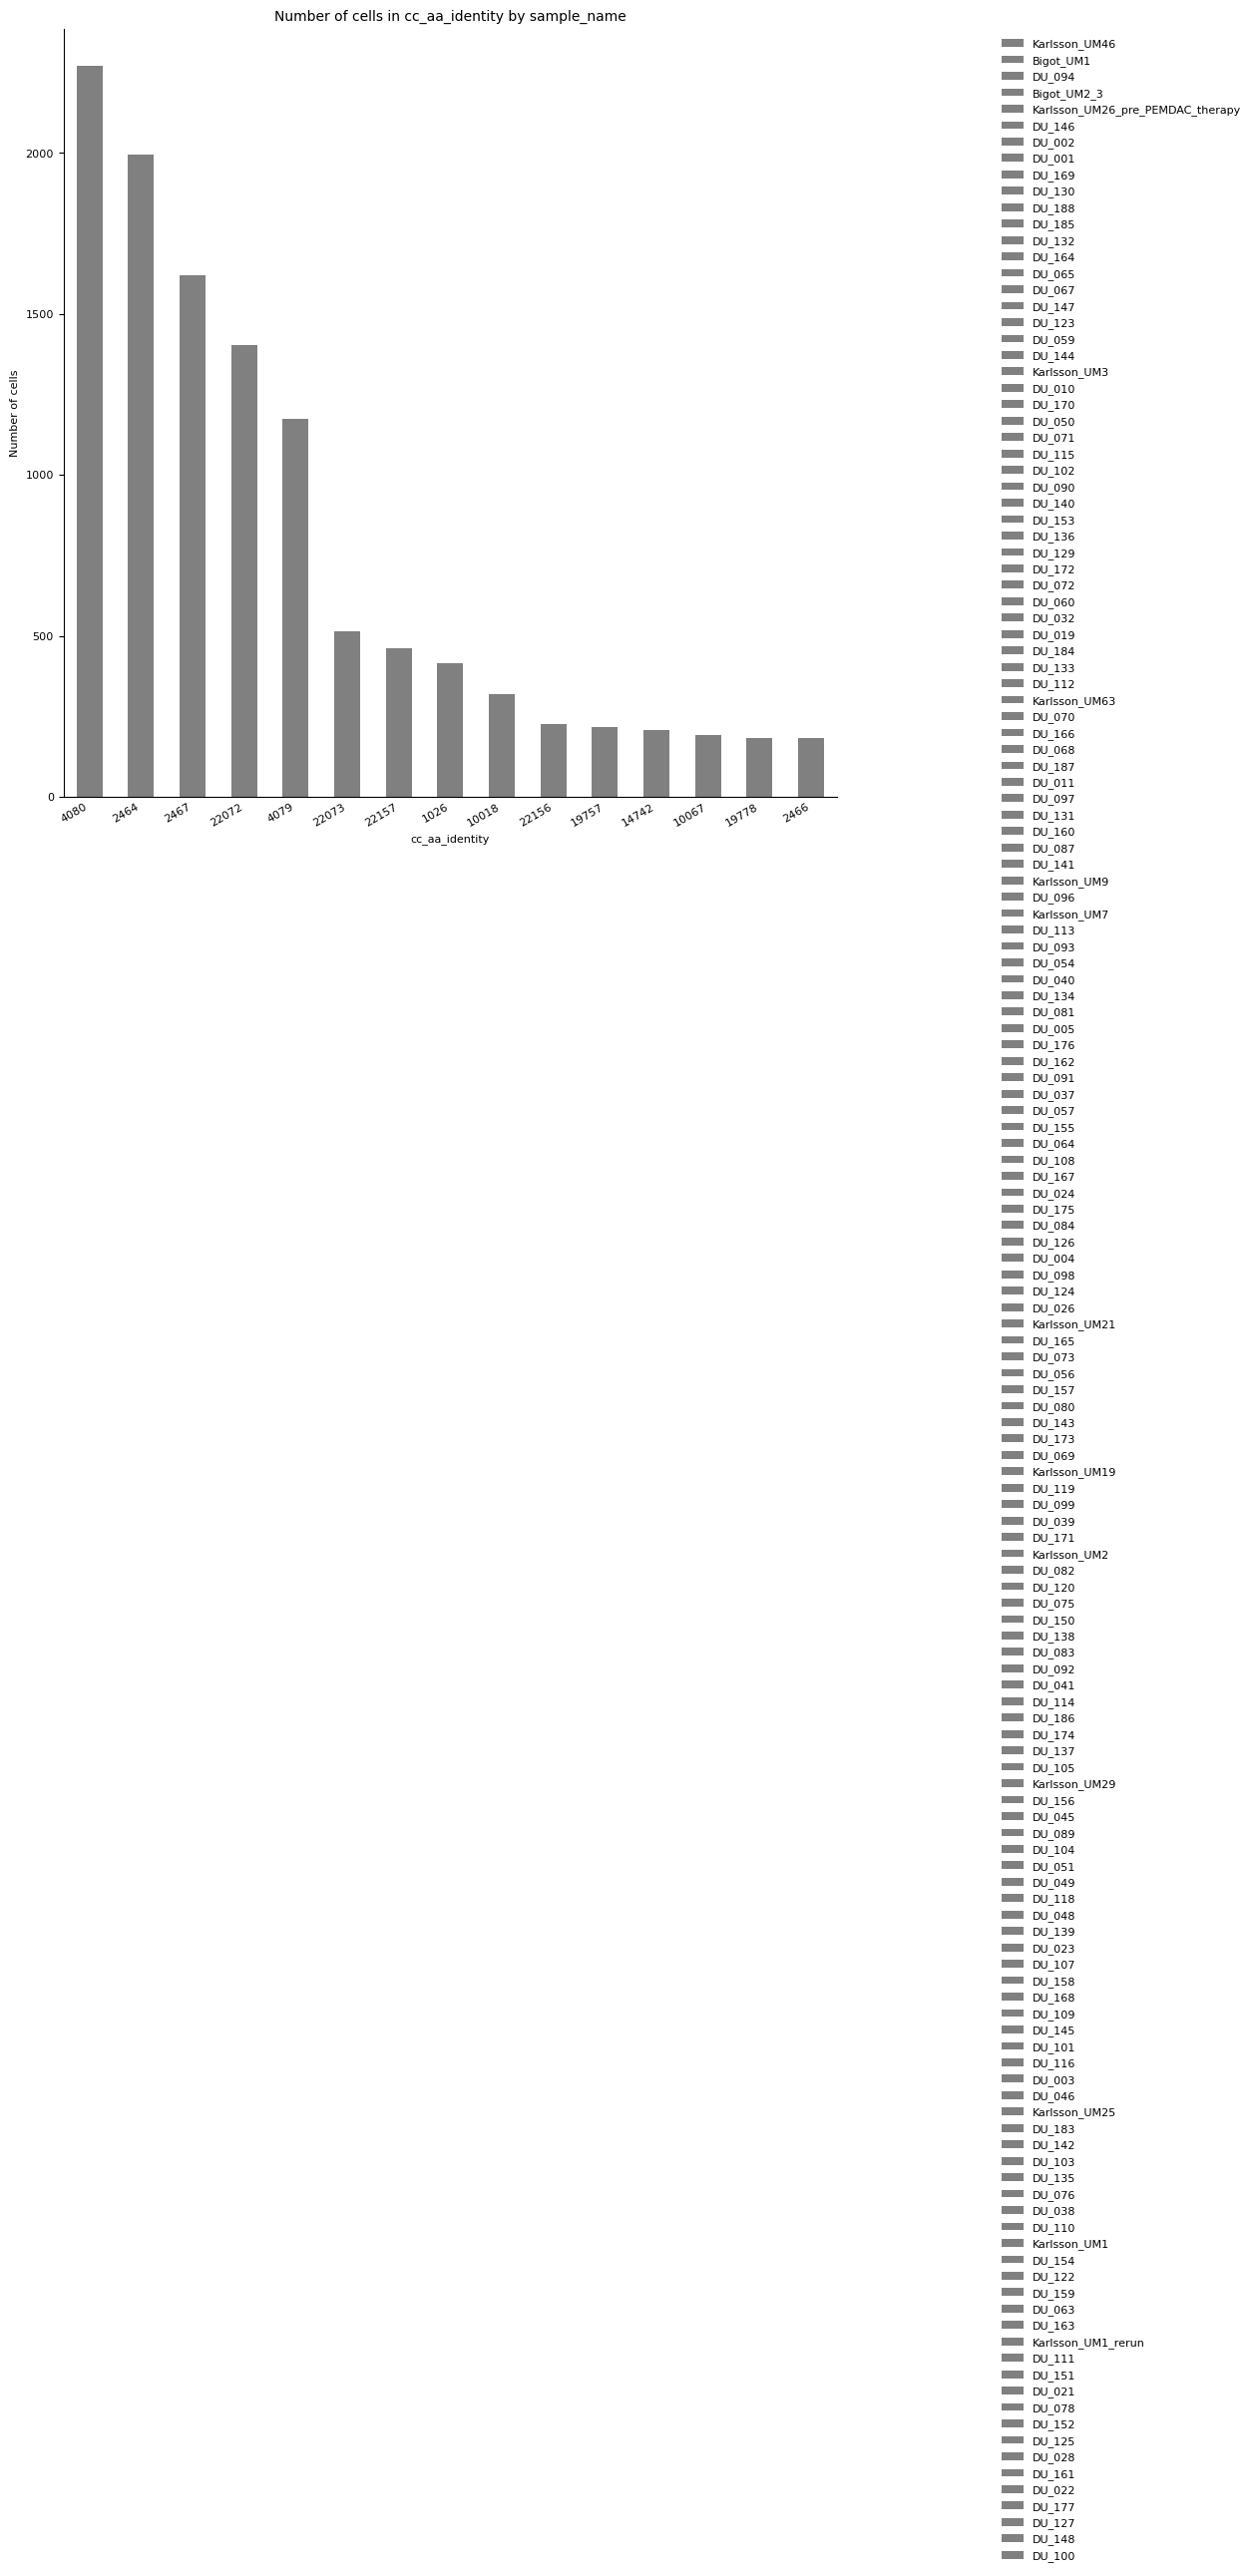

In [71]:
# By condition

_ = ir.pl.group_abundance(
    adata_dis,
    groupby="cc_aa_identity",
    target_col="cell_subtype_3_prediction",
    max_cols=15,
    fig_kws={"dpi": 100},
    figsize=[10, 10],
)

# By sample

_ = ir.pl.group_abundance(
    adata_dis,
    groupby="cc_aa_identity",
    target_col="sample_name",
    max_cols=15,
    fig_kws={"dpi": 100},
    figsize=[10, 10],
)

In [ ]:
import scirpy as ir
import pandas as pd

# Download VDJdb (or load local copy)
# From: https://vdjdb.cdr3.net/
vdjdb = ir.datasets.vdjdb()

# Or load from file
# vdjdb = pd.read_csv('vdjdb.tsv', sep='\t')

# Query your TCRs against VDJdb
ir.pp.ir_dist(adata_dis, vdjdb, metric="identity", sequence="aa")
ir.tl.ir_query(
    adata_dis, 
    vdjdb,
    metric="identity",
    sequence="aa",
    receptor_arms="all",
    dual_ir="any"
)

# Check matches
print(adata_dis.obs['ir_query_antigen'].value_counts())

In [ ]:
ir.pp.ir_dist(adata_dis, vdjdb, metric="identity", sequence="aa")


In [100]:
ir.tl.alpha_diversity(adata_integrated, groupby='sample_name',  target_col="clone_id", metric='normalized_shannon_entropy')

In [104]:
adata_integrated

AnnData object with n_obs × n_vars = 1210559 × 3848
    obs: 'treatment', 'Annotation', 'disease', 'study_name', 'atlas_name', 'disease_type', 'sample_name', 'treatment_group', 'cell_subtype_3', 'n_counts', 'cell_subtype_3_prediction', 'cell_subtype_zheng_2021_prediction', 'Sample', 'Sample_Name', 'Dataset', 'IR_VJ_1_v_call', 'IR_VJ_1_j_call', 'IR_VJ_1_junction_aa', 'IR_VDJ_1_v_call', 'IR_VDJ_1_j_call', 'IR_VDJ_1_junction_aa', 'Cartridge', 'meta_tissue_type', 'meta_cell_subset', 'tcr', 'cc_aa_identity', 'cc_aa_identity_size', 'expansion_level', 'expansion_size', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'clonal_expansion', 'normalized_shannon_entropy_cc_aa_identity'
    uns: 'cell_subtype_3_prediction_logits', 'chain_indices', 'ir_dist_aa_identity', 'cc_aa_identity', 'clonotype_network', 'cell_subtype_3_prediction_colors', 'disease_type_colors'
    obsm: 'X_gex', 'X_umap', 'airr', 'chain_indices', 'X_clonotype_network'

/tmp/ipykernel_3629408/2258607577.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/tmp/ipykernel_3629408/2258607577.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


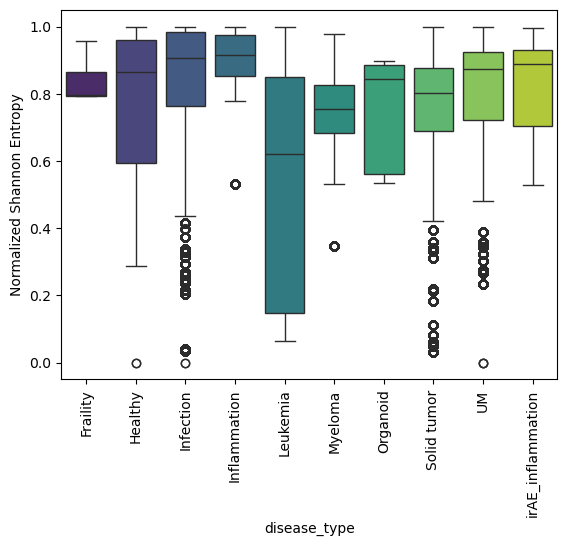

In [110]:
ax = sns.boxplot(
    data=adata_integrated.obs,
    x='disease_type', 
    y='normalized_shannon_entropy_cc_aa_identity',
    palette='viridis' # Optional: set a color palette
)

ax.set_ylabel("Normalized Shannon Entropy")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [108]:
adata_integrated.obs['normalized_shannon_entropy_cc_aa_identity']

53314-A4069-Cartridge-I3-Berlin-UM      0.802728
60757-A4069-Cartridge-I3-Berlin-UM      0.802728
73218-A4069-Cartridge-I3-Berlin-UM      0.802728
82365-A4069-Cartridge-I3-Berlin-UM      0.802728
90127-A4069-Cartridge-I3-Berlin-UM      0.802728
                                          ...   
TTAGTTCAGCTAAACA-Simone_2021-AS02_SF    0.832980
TTCCCAGCAATGCCAT-Simone_2021-AS02_SF    0.832980
TTCGAAGAGCTAACTC-Simone_2021-AS02_SF    0.832980
TTGCCGTCAATGCCAT-Simone_2021-AS02_SF    0.832980
TTGCGTCTCGGATGTT-Simone_2021-AS02_SF    0.832980
Name: normalized_shannon_entropy_cc_aa_identity, Length: 1210559, dtype: float64

In [ ]:
'ir_dist_VDJDB_aa_identity', 'ir_query_VDJDB_aa_identity', 'vdjdb_match'